# Part 1. Data Science Concept

# 1. Matplotlib

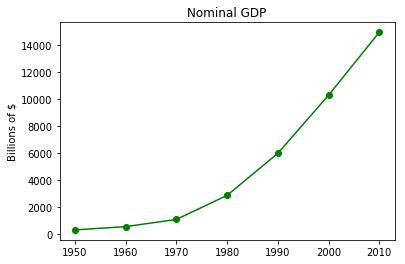

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline  
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()                            

## Bar Charts

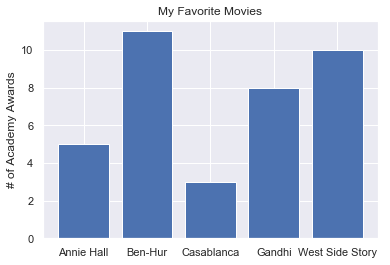

In [229]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
# label x-axis with movie names at bar centers
plt.xticks([i + 0.1 for i, _ in enumerate(movies)], movies)
plt.show()

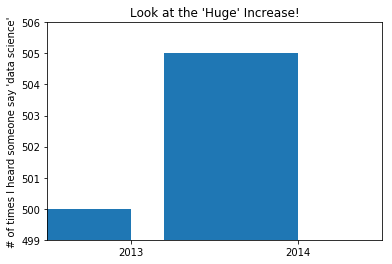

In [4]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

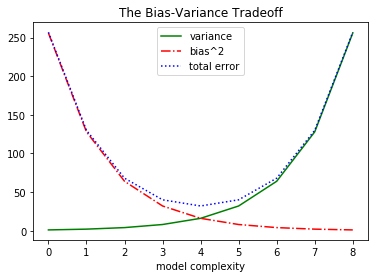

In [5]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# because we've assigned labels to each series
# we can get a legend for free
# loc=9 means "top center"
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Scatterplots

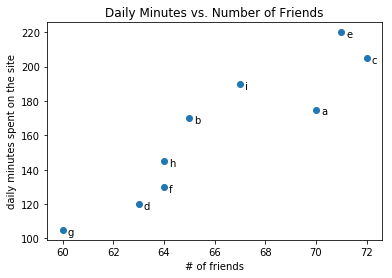

In [7]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
# label each point
# label each point
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
    xy=(friend_count, minute_count), # put the label with its point
    xytext=(5, -5), # but slightly offset
    textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

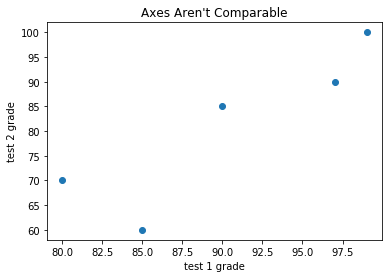

In [8]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

## For Further Exploration

seaborn is built on top of matplotlib and allows you to easily produce prettier (and
more complex) visualizations.

D3.js is a JavaScript library for producing sophisticated interactive visualizations for
the web. Although it is not in Python, it is both trendy and widely used, and it is well
worth your while to be familiar with it.

Bokeh is a newer library that brings D3-style visualizations into Python.

ggplot is a Python port of the popular R library ggplot2, which is widely used for
creating “publication quality” charts and graphics. It’s probably most interesting if
you’re already an avid ggplot2 user, and possibly a little opaque if you’re not.

# 2. Machine Learning

## Modeling
Before we can talk about machine learning we need to talk about models.
What is a model? It’s simply a specification of a mathematical (or probabilistic)
relationship that exists between different variables.
For instance, if you’re trying to raise money for your social networking site, you might
build a business model (likely in a spreadsheet) that takes inputs like “number of users”
and “ad revenue per user” and “number of employees” and outputs your annual profit for
the next several years. A cookbook recipe entails a model that relates inputs like “number
of eaters” and “hungriness” to quantities of ingredients needed. And if you’ve ever
watched poker on television, you know that they estimate each player’s “win probability”
in real time based on a model that takes into account the cards that have been revealed so
far and the distribution of cards in the deck.
The business model is probably based on simple mathematical relationships: profit is
revenue minus expenses, revenue is units sold times average price, and so on. The recipe
model is probably based on trial and error — someone went in a kitchen and tried different
combinations of ingredients until they found one they liked. And the poker model is based
on probability theory, the rules of poker, and some reasonably innocuous assumptions
about the random process by which cards are dealt.

## What Is Machine Learning?

Everyone has her own exact definition, but we’ll use machine learning to refer to creating
and using models that are learned from data. In other contexts this might be called
predictive modeling or data mining, but we will stick with machine learning. Typically,
our goal will be to use existing data to develop models that we can use to predict various
outcomes for new data, such as:

1. Predicting whether an email message is spam or not
2. Predicting whether a credit card transaction is fraudulent
3. Predicting which advertisement a shopper is most likely to click on
4. Predicting which football team is going to win the Super Bowl

We’ll look at both supervised models (in which there is a set of data labeled with the
correct answers to learn from), and unsupervised models (in which there are no such
labels). There are various other types like semisupervised (in which only some of the data
are labeled).

For instance, we might assume that a person’s height is (roughly) a linear function of his
weight and then use data to learn what that linear function is. Or we might assume that a
decision tree is a good way to diagnose what diseases our patients have and then use data
to learn the “optimal” such tree. Throughout the rest of the book we’ll be investigating
different families of models that we can learn.

But before we can do that, we need to better understand the fundamentals of machine
learning. For the rest of the chapter, we’ll discuss some of those basic concepts, before we
move on to the models themselves.

## Overfitting and Underfitting
A common danger in machine learning is overfitting — producing a model that performs
well on the data you train it on but that generalizes poorly to any new data. This could
involve learning noise in the data. Or it could involve learning to identify specific inputs
rather than whatever factors are actually predictive for the desired output.
The other side of this is underfitting, producing a model that doesn’t perform well even on
the training data, although typically when this happens you decide your model isn’t good
enough and keep looking for a better one.

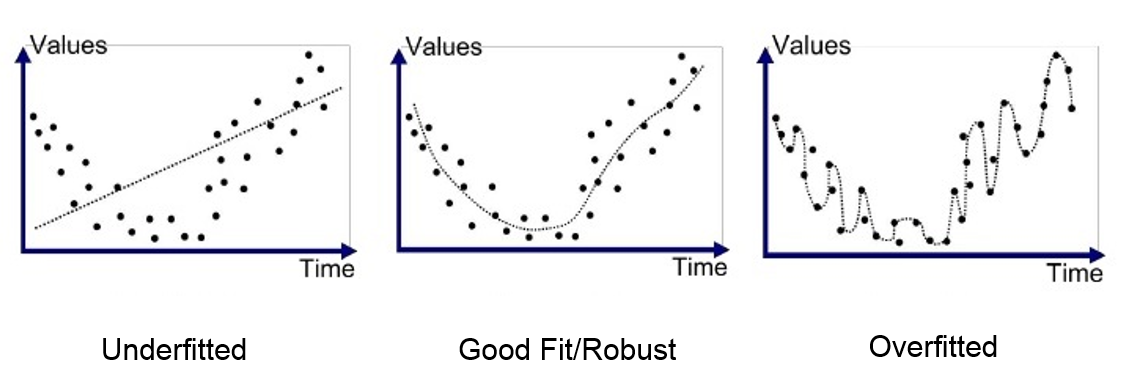

In [9]:
from IPython.display import Image
Image("fitting.png")

## Split Data

Often, we’ll have a matrix x of input variables and a vector y of output variables. In that
case, we need to make sure to put corresponding values together in either the training data
or the test data:

In [ ]:
def train_test_split(x, y, test_pct):
    data = zip(x, y) # pair corresponding values
    train, test = split_data(data, 1 - test_pct) # split the data set of pairs
    x_train, y_train = zip(*train) # magical un-zip trick
    x_test, y_test = zip(*test)
    return x_train, x_test, y_train, y_test

so that you might do something like:


In [ ]:
model = SomeKindOfModel()
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
model.train(x_train, y_train)
performance = model.test(x_test, y_test)

If the model was overfit to the training data, then it will hopefully perform really poorly
on the (completely separate) test data. Said differently, if it performs well on the test data,
then you can be more confident that it’s fitting rather than overfitting.
However, there are a couple of ways this can go wrong.
The first is if there are common patterns in the test and train data that wouldn’t generalize
to a larger data set.

For example, imagine that your data set consists of user activity, one row per user per
week. In such a case, most users will appear in both the training data and the test data, and
certain models might learn to identify users rather than discover relationships involving
attributes. This isn’t a huge worry, although it did happen to me once.

A bigger problem is if you use the test/train split not just to judge a model but also to
choose from among many models. In that case, although each individual model may not
be overfit, the “choose a model that performs best on the test set” is a meta-training that
makes the test set function as a second training set. (Of course the model that performed
best on the test set is going to perform well on the test set.)

In such a situation, you should split the data into three parts: a training set for building
models, a validation set for choosing among trained models, and a test set for judging the
final model.

# Correctness

When I’m not doing data science, I dabble in medicine. And in my spare time I’ve come
up with a cheap, noninvasive test that can be given to a newborn baby that predicts —
with greater than 98% accuracy — whether the newborn will ever develop leukemia. My
lawyer has convinced me the test is unpatentable, so I’ll share with you the details here:
predict leukemia if and only if the baby is named Luke (which sounds sort of like
“leukemia”).

As we’ll see below, this test is indeed more than 98% accurate. Nonetheless, it’s an
incredibly stupid test, and a good illustration of why we don’t typically use “accuracy” to
measure how good a model is.
Imagine building a model to make a binary judgment. Is this email spam? Should we hire
this candidate? Is this air traveler secretly a terrorist?

Given a set of labeled data and such a predictive model, every data point lies in one of
four categories:
    
1. True positive: “This message is spam, and we correctly predicted spam.”
2. False positive (Type 1 Error): “This message is not spam, but we predicted spam.”
3. False negative (Type 2 Error): “This message is spam, but we predicted not spam.”
4. True negative: “This message is not spam, and we correctly predicted not spam.”
    
We often represent these as counts in a confusion matrix:

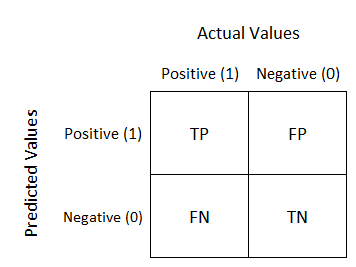

In [11]:
from IPython.display import Image
Image("confusion.png")

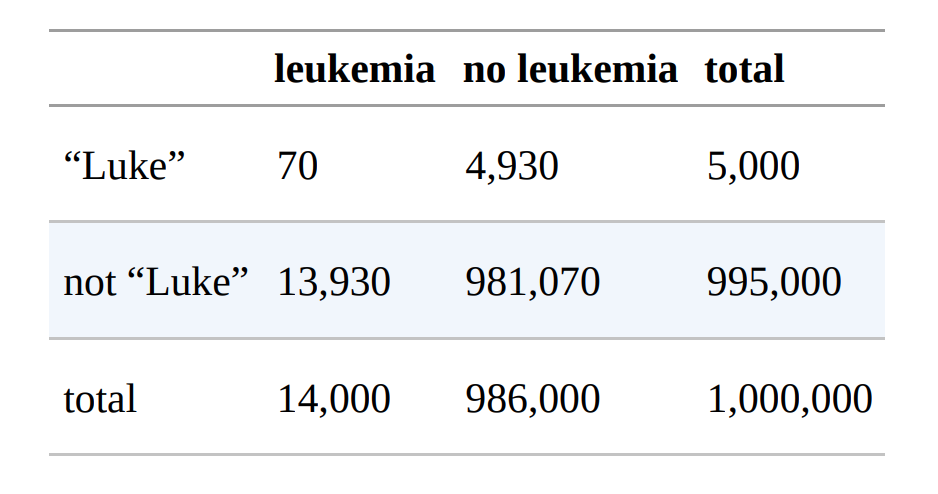

In [13]:
from IPython.display import Image
Image("matrix.png")

In [231]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / float(total)


In [232]:
print accuracy(70, 4930, 13930, 981070)

0.98114


In [234]:
986000/float(1000000)

0.986

It’s common to look at the combination of precision and recall. Precision measures how
accurate our positive predictions were:

In [237]:
def precision(tp, fp, fn, tn):
    return tp / float(tp + fp)


In [238]:
print precision(70, 4930, 13930, 981070)

0.014


And recall measures what fraction of the positives our model identified:

In [239]:
def recall(tp, fp, fn, tn):
    return tp / float(tp + fn)

In [240]:
print recall(70, 4930, 13930, 981070) 

0.005


These are both terrible numbers, reflecting that this is a terrible model.
Sometimes precision and recall are combined into the F1 score, which is defined as:

In [241]:
def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

In [242]:
print f1_score(70, 4930, 13930, 981070)

0.00736842105263


This is the harmonic mean of precision and recall and necessarily lies between them.
Usually the choice of a model involves a trade-off between precision and recall. A model that predicts “yes” when it’s even a little bit confident will probably have a high recall but
a low precision; a model that predicts “yes” only when it’s extremely confident is likely to
have a low recall and a high precision.
Alternatively, you can think of this as a trade-off between false positives and false
negatives. Saying “yes” too often will give you lots of false positives; saying “no” too
often will give you lots of false negatives.

想像一下，白血病有10個危險因素，而且你有更多的白血病
你越有可能患上白血病。在這種情況下，你可以想像一個連續統一體測試：“預測白血病，如果至少有一個風險因素，”“預測白血病，如果至少有兩個風險因素，“等等。當你增加閾值時，你會提高測試的精度（因為風險因素較多的人更有可能患上這種疾病），而且你減少了這種疾病
測試召回（因為最終的疾病患者會越來越少見到門限）。在這種情況下，選擇正確的閾值是找到正確的問題交易。

## The Bias-Variance Trade-off

Another way of thinking about the overfitting problem is as a trade-off between bias and
variance.
Both are measures of what would happen if you were to retrain your model many times on
different sets of training data (from the same larger population).
For example, the degree 0 model in “Overfitting and Underfitting” will make a lot of
mistakes for pretty much any training set (drawn from the same population), which means
that it has a high bias. However, any two randomly chosen training sets should give pretty
similar models (since any two randomly chosen training sets should have pretty similar
average values). So we say that it has a low variance. High bias and low variance typically
correspond to underfitting.

On the other hand, the degree 9 model fit the training set perfectly. It has very low bias but
very high variance (since any two training sets would likely give rise to very different
models). This corresponds to overfitting.
Thinking about model problems this way can help you figure out what do when your
model doesn’t work so well.

If your model has high bias (which means it performs poorly even on your training data)
then one thing to try is adding more features. Going from the degree 0 model in
“Overfitting and Underfitting” to the degree 1 model was a big improvement.
If your model has high variance, then you can similarly remove features. But another
solution is to obtain more data (if you can).

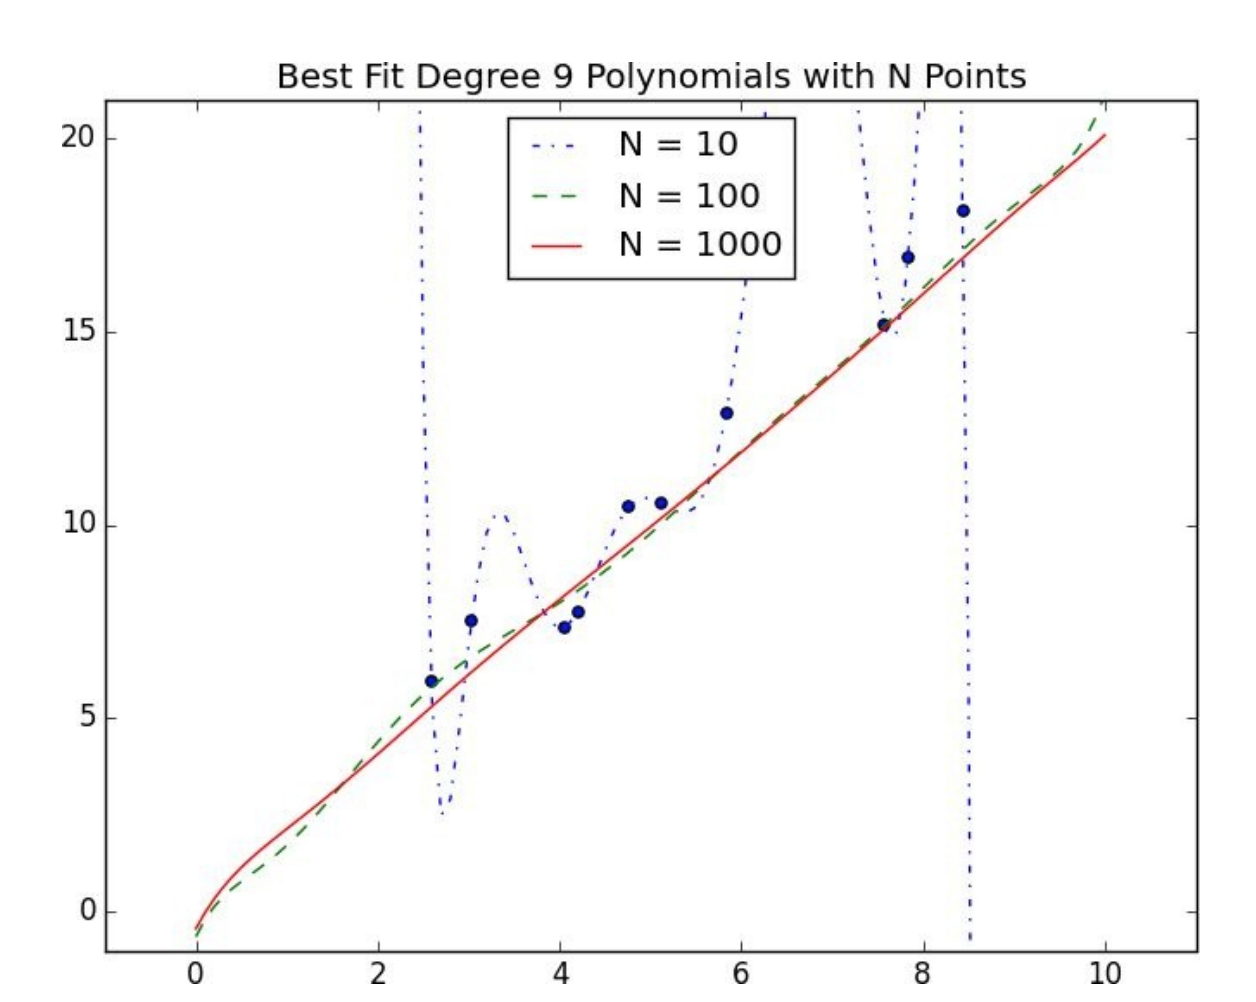

In [14]:
from IPython.display import Image
Image("moredata.png")

In Figure 11-2, we fit a degree 9 polynomial to different size samples. The model fit based
on 10 data points is all over the place, as we saw before. If we instead trained on 100 data
points, there’s much less overfitting. And the model trained from 1,000 data points looks
very similar to the degree 1 model.
Holding model complexity constant, the more data you have, the harder it is to overfit.
On the other hand, more data won’t help with bias. If your model doesn’t use enough
features to capture regularities in the data, throwing more data at it won’t help.

## Feature Extraction and Selection

As we mentioned, when your data doesn’t have enough features, your model is likely to
underfit. And when your data has too many features, it’s easy to overfit. But what are
features and where do they come from?
Features are whatever inputs we provide to our model.
In the simplest case, features are simply given to you. If you want to predict someone’s
salary based on her years of experience, then years of experience is the only feature you
have.

(Although, as we saw in “Overfitting and Underfitting”, you might also consider adding
years of experience squared, cubed, and so on if that helps you build a better model.)
Things become more interesting as your data becomes more complicated. Imagine trying
to build a spam filter to predict whether an email is junk or not. Most models won’t know
what to do with a raw email, which is just a collection of text. You’ll have to extract
features. For example:
Does the email contain the word “Viagra”?
How many times does the letter d appear?
What was the domain of the sender?
The first is simply a yes or no, which we typically encode as a 1 or 0. The second is a
number. And the third is a choice from a discrete set of options.
Pretty much always, we’ll extract features from our data that fall into one of these three
categories. What’s more, the type of features we have constrains the type of models we
can use.

# Part 2. 8 Machine Learning Algorithms

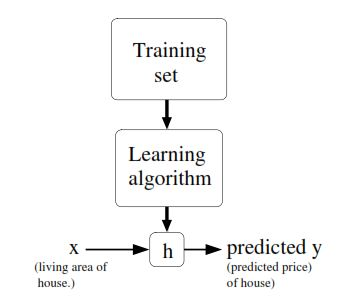

In [25]:
from IPython.display import Image
Image("ml.jpg")

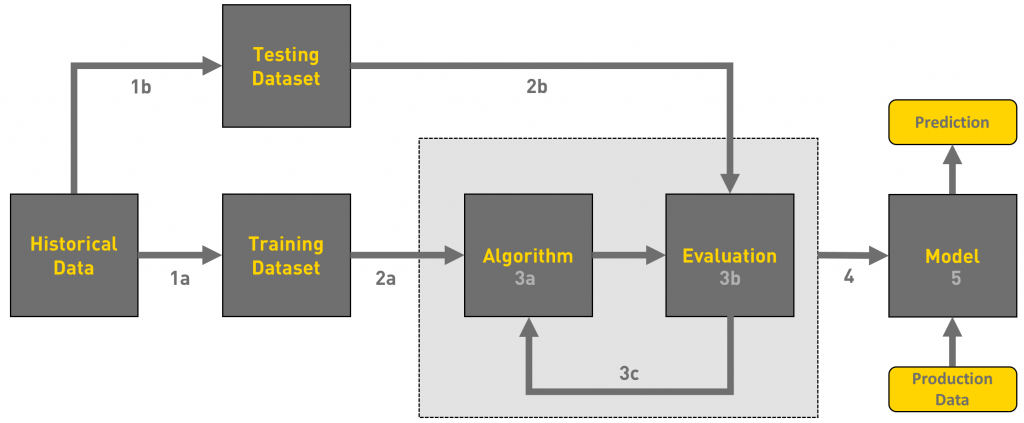

In [116]:
Image("workflow.png")

# 1. k-Nearest Neighbors

Imagine that you’re trying to predict how I’m going to vote in the next presidential
election. If you know nothing else about me (and if you have the data), one sensible
approach is to look at how my neighbors are planning to vote. Living in downtown
Seattle, as I do, my neighbors are invariably planning to vote for the Democratic
candidate, which suggests that “Democratic candidate” is a good guess for me as well.

Now imagine you know more about me than just geography — perhaps you know my age,
my income, how many kids I have, and so on. To the extent my behavior is influenced (or
characterized) by those things, looking just at my neighbors who are close to me among
all those dimensions seems likely to be an even better predictor than looking at all my
neighbors. This is the idea behind nearest neighbors classification.

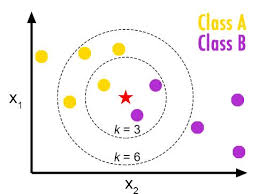

In [15]:
from IPython.display import Image
Image("knn.jpg")

## Classification:
In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
## Value:
In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

In [1]:
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets
# import some data to play with
iris = datasets.load_iris()

In [21]:
X = iris.data[:, :4] # we only take the first two features. 
Y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)  

In [4]:
dataset.head() 

sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

## Preprocessing
The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [5]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values 

The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

## Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

## Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [7]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [8]:
X_train

array([[ 1.63368203,  0.34351367,  1.23310588,  0.76103366],
       [ 0.30907498, -0.38823143,  0.51047433,  0.24869683],
       [-0.05218149, -0.8760615 ,  0.7328225 ,  0.88911786],
       [ 0.79075027,  0.34351367,  0.7328225 ,  1.01720207],
       [ 2.23577614, -0.1443164 ,  1.28869292,  1.40145468],
       [ 0.79075027, -0.1443164 ,  0.95517067,  0.76103366],
       [ 0.18865616, -0.8760615 ,  0.7328225 ,  0.50486524],
       [ 0.4294938 , -2.09563668,  0.39930025,  0.37678104],
       [-1.738045  , -0.1443164 , -1.37948509, -1.28831364],
       [-0.29301913, -0.1443164 ,  0.39930025,  0.37678104],
       [ 0.67033145, -0.63214647,  1.01075771,  1.27337048],
       [-1.13595089, -1.60780661, -0.26774425, -0.26363999],
       [ 0.67033145,  0.34351367,  0.39930025,  0.37678104],
       [-1.738045  ,  0.34351367, -1.37948509, -1.28831364],
       [ 0.30907498, -1.11997654,  1.01075771,  0.24869683],
       [-1.25636971, -0.1443164 , -1.32389805, -1.41639784],
       [-0.53385678,  1.

## Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following script:

In [11]:
y_pred = classifier.predict(X_test)  

## Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 9  0  0]
 [ 0 12  0]
 [ 0  4  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.75      1.00      0.86        12
 Iris-virginica       1.00      0.56      0.71         9

      micro avg       0.87      0.87      0.87        30
      macro avg       0.92      0.85      0.86        30
   weighted avg       0.90      0.87      0.86        30



## Comparing Error Rate with the K Value
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

Text(0,0.5,'Mean Error')

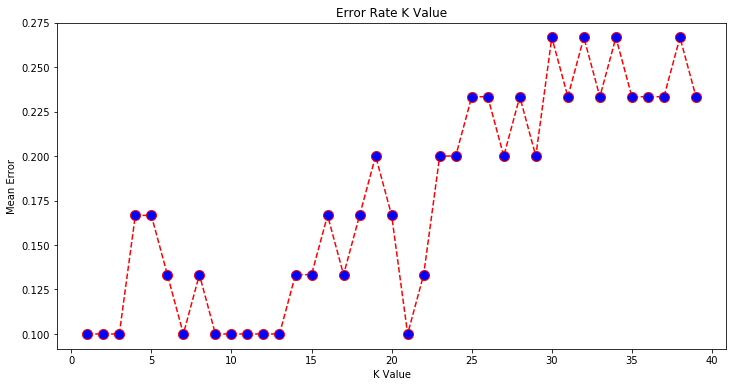

In [16]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

## Pros and Cons of KNN
In this section we'll present some of the pros and cons of using the KNN algorithm.

## Pros

1. It is extremely easy to implement

2. As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.

3. Since the algorithm requires no training before making predictions, new data can be added seamlessly.

4. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

## Cons

1. The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.

2. The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.

3. Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

# 2. Naive Bayes

## Titanic Disaster dataset.
It gathers Titanic passenger personal information and whether or not they survived to the shipwreck. Let’s try to make a prediction of survival using passenger ticket fare information.



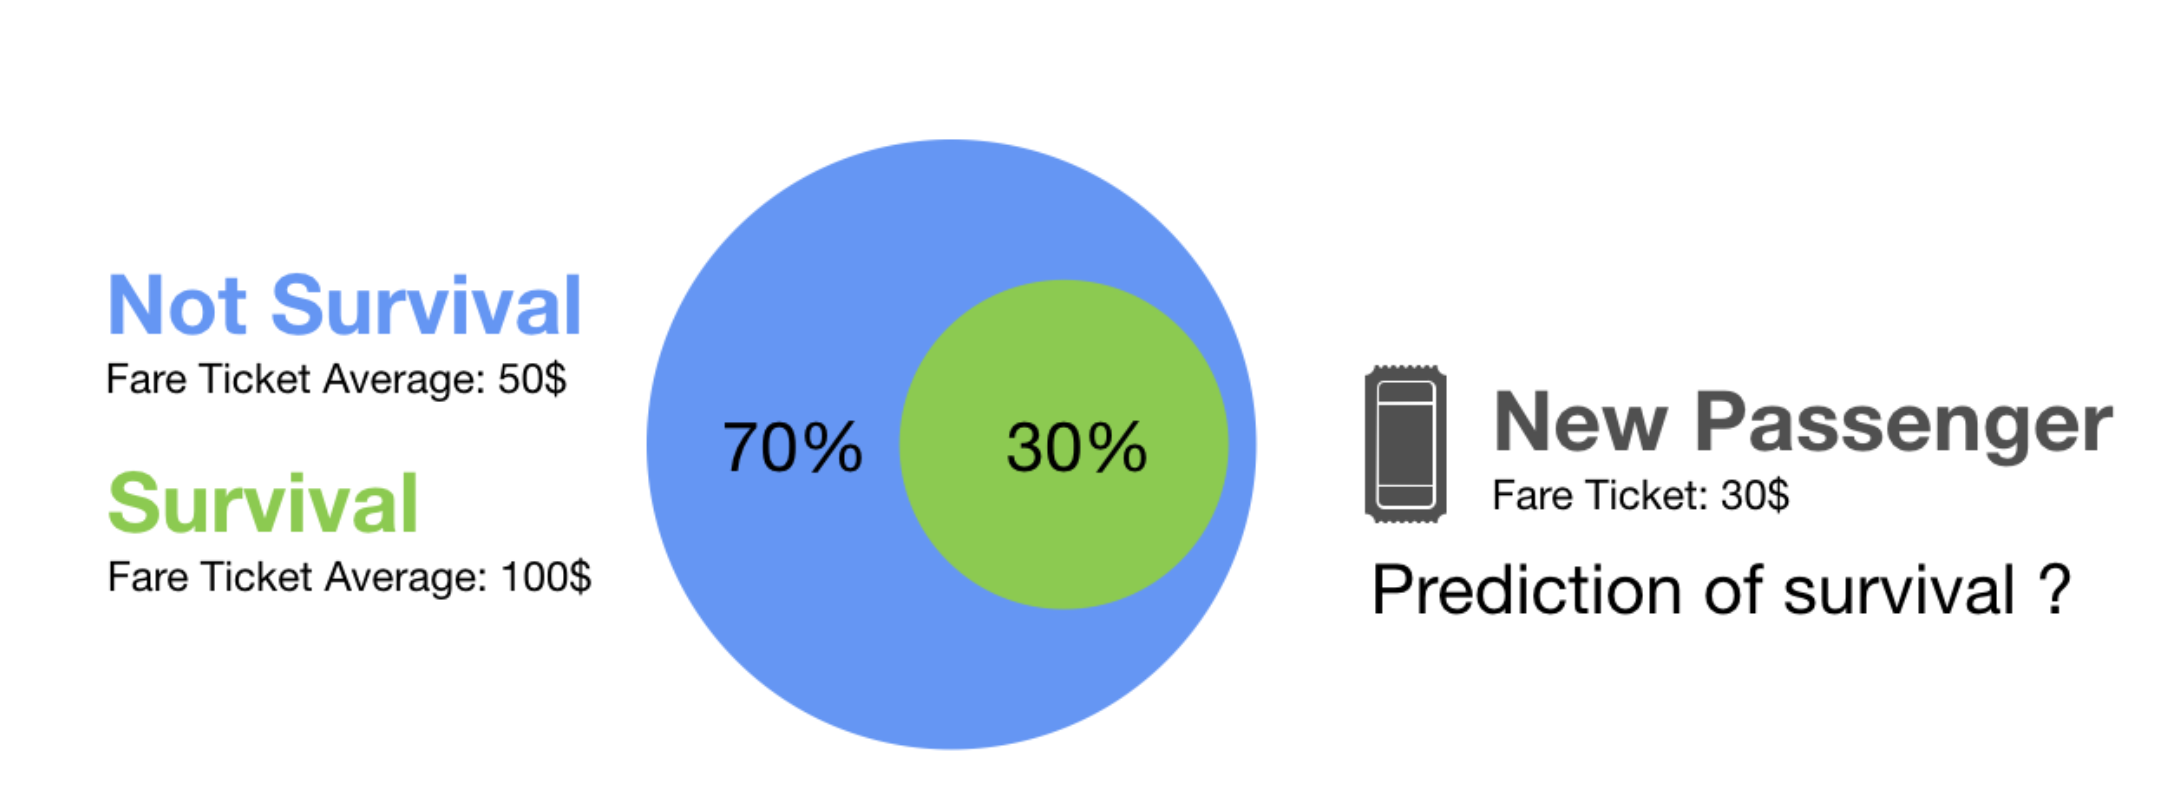

In [4]:
from IPython.display import Image
Image("nb1.png")

Imagine you take a random sample of 500 passengers. In this sample, 30% of people survived. Among passenger who survived, the fare ticket mean is 100USD. 

It falls to 50USD in the subset of people who did not survive. Now, let’s say you have a new passenger. You do not know if he survived or not but you know he bought a 30USD ticket to cross the Atlantic. What is your prediction of survival for this passenger?

## Principle
Ok, you probably answered that this passenger did not survive. Why? Because according to the information contained in the random subset of passengers, you assumed that chances of survival were low and that being poor reduced chances of survival. You put this passenger in the closest group of likelihood (the low fare ticket group). This is what the Naive Bayes classifier does.

## How does it work?
The Naive Bayes classifier aggregates information using conditional probability with an assumption of independence among features. What does it mean? For example, it means we have to assume that the comfort of the room on the Titanic is independent of the fare ticket. 

This assumption is absolutely wrong and it is why it is called Naive. It allows to simplify the calculation, even on very large datasets. Let’s find why.

The Naive Bayes classifier is based on finding functions describing the probability of belonging to a class given features. We write it P(Survival | f1,…, fn). We apply the Bayes law to simplify the calculation:

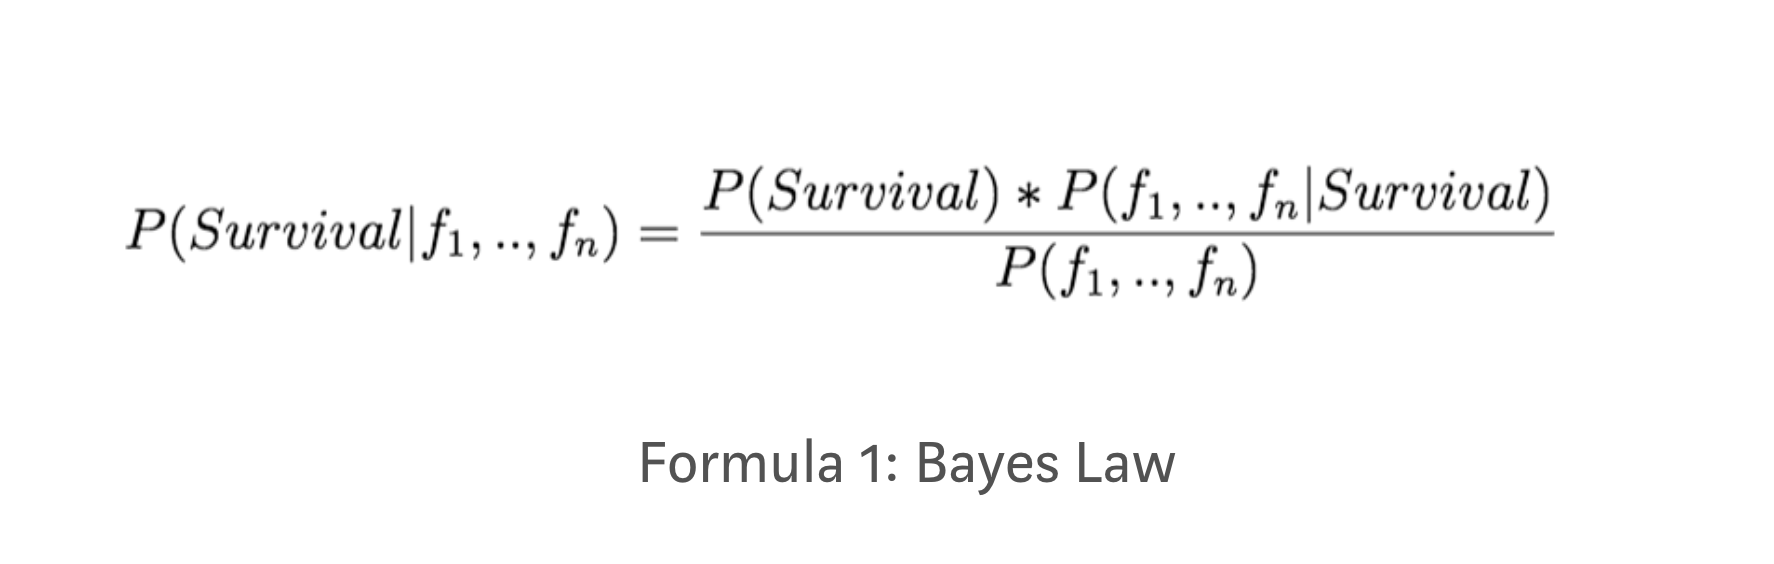

In [5]:
from IPython.display import Image
Image("nb2.png")

P(Survival) is easy to compute and we do not need P( f1,…, fn) to build a classifier. It remains P(f1,…, fn | Survival) calculation. If we apply the conditional probability formula to simplify calculation again:

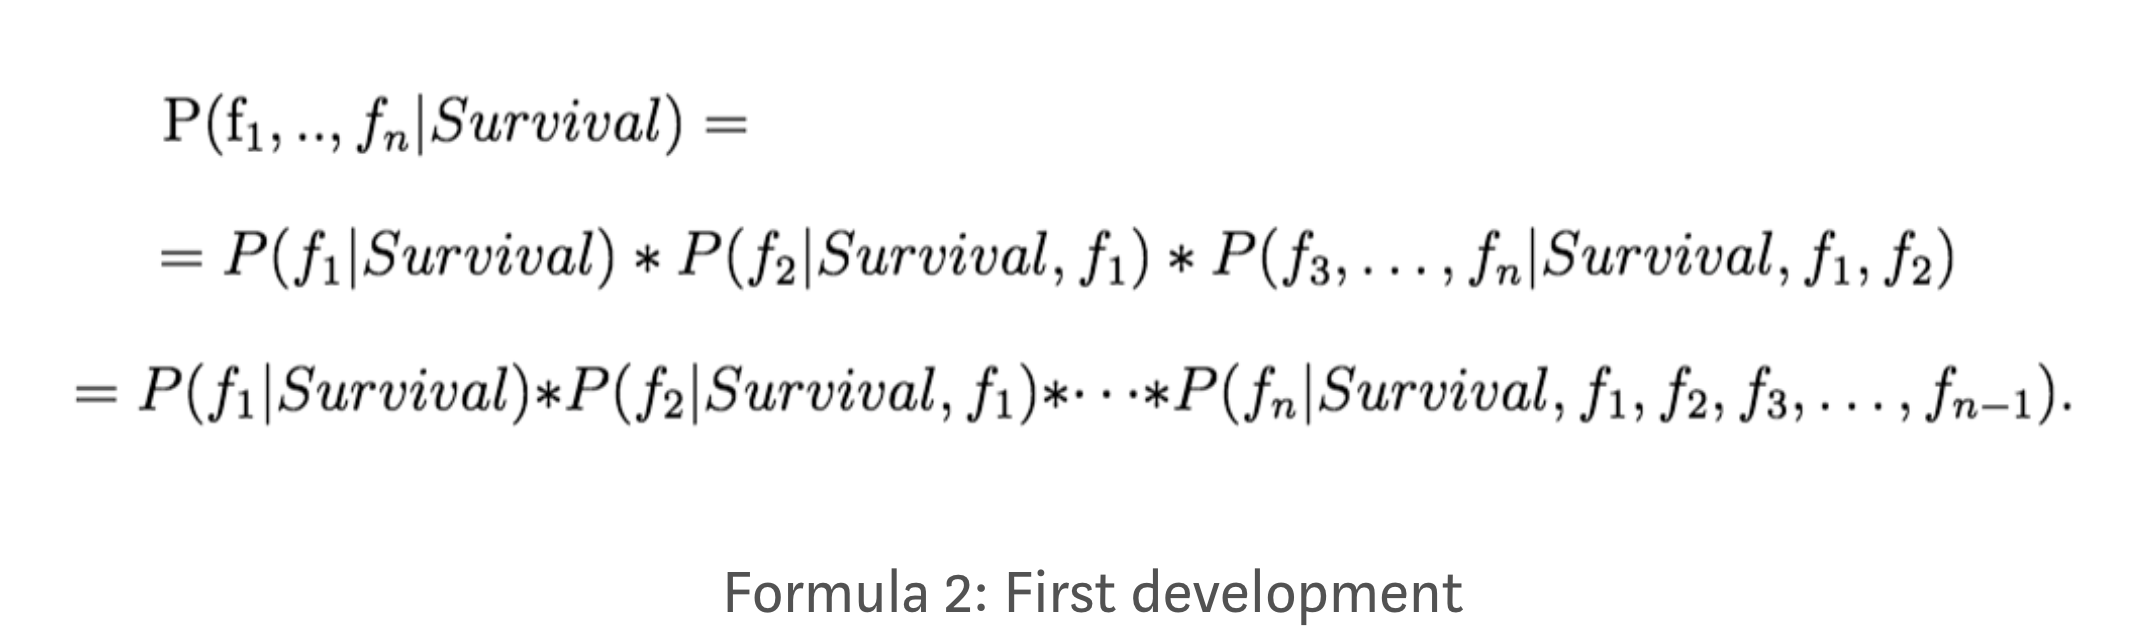

In [6]:
Image("nb3.png")

Each calculation of terms of the last line above requires a dataset where all conditions are available. To calculate the probability of obtaining f_n given the Survival, f_1, …, f_n-1 information, we need to have enough data with different values of f_n where condition {Survival, f_1, …, f_n-1} is verified. 
## It requires a lot of data. 

We face the curse of dimensionality. Here is where the Naive Assumption will help.
## As feature are assumed independent,

we can simplify calculation by considering that the condition {Survival, f_1, …, f_n-1} is equal to {Survival}:

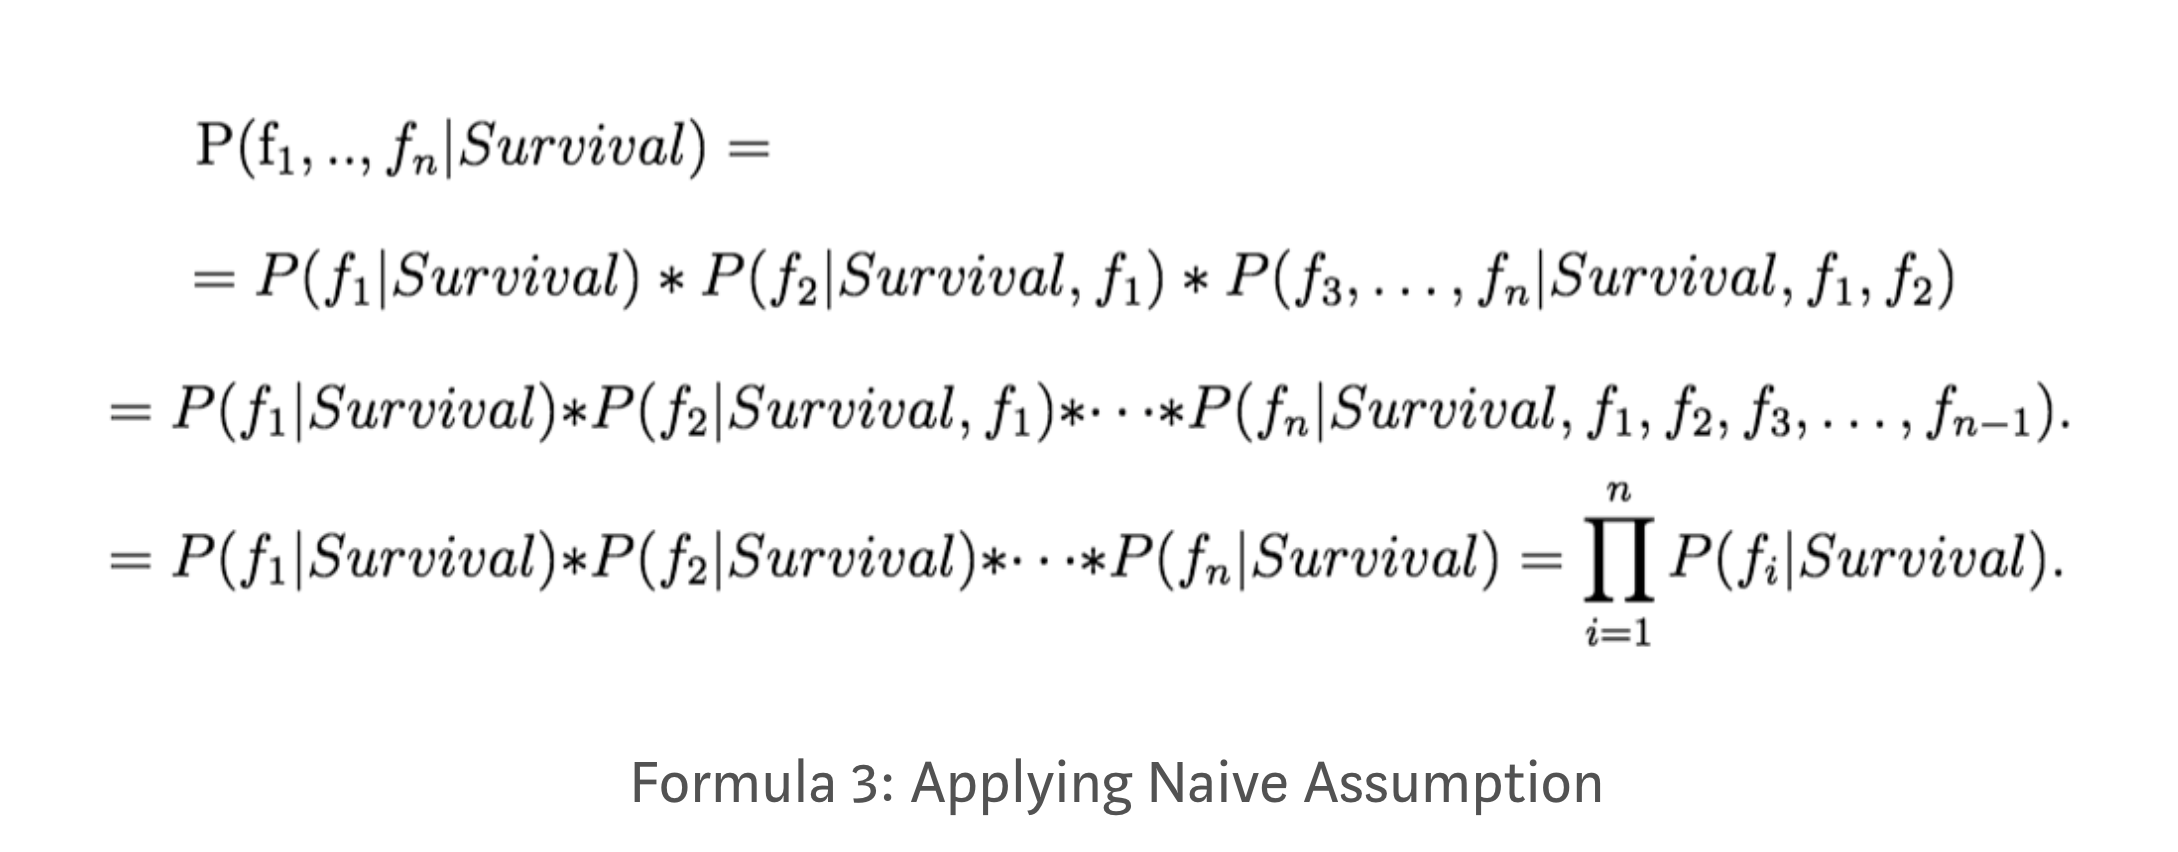

In [7]:
Image("nb4.png")

Finally to classify a new vector of features, we just have to choose the Survival value (1 or 0) for which P(f_1, …, f_n|Survival) is the highest:

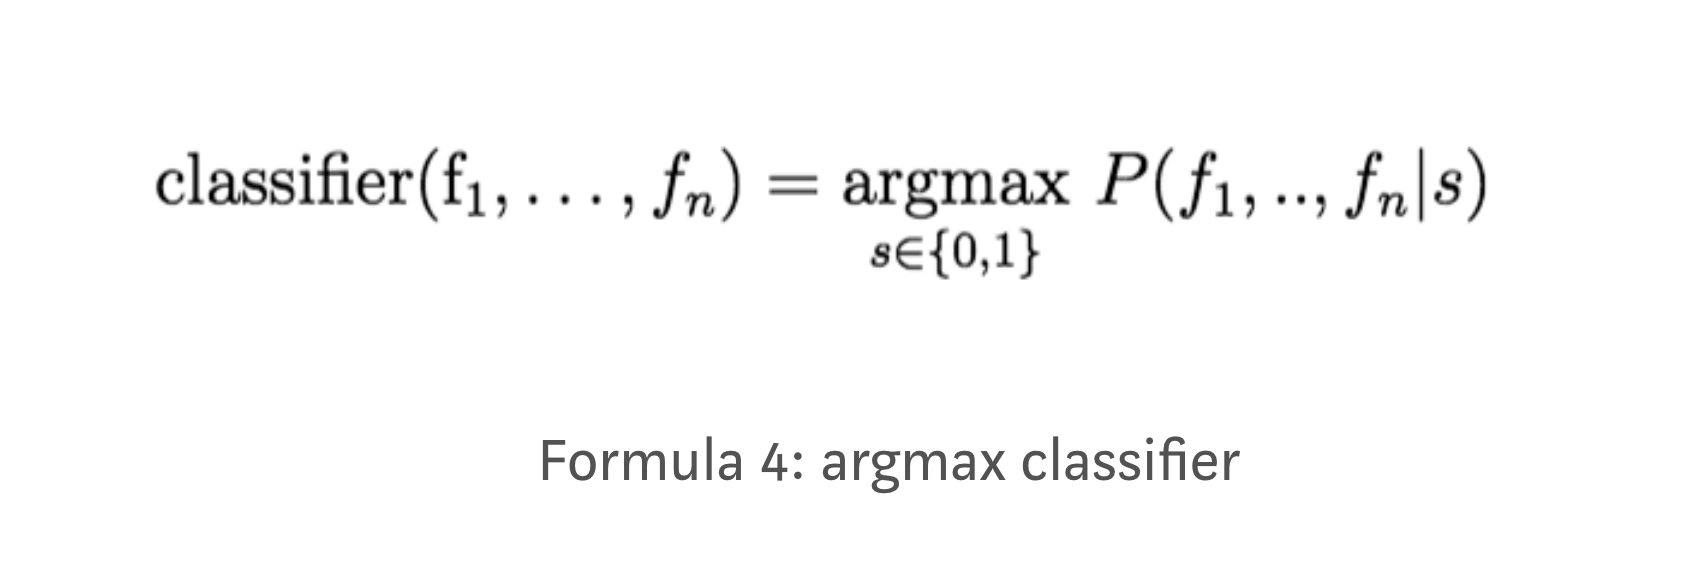

In [8]:
Image("nb5.png")

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Importing dataset
data = pd.read_csv("data/train.csv")

In [16]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [17]:
# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
                                 )
# Cleaning dataset of NaN
data=data[[
    "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]].dropna(axis=0, how='any')

# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))

In [18]:
# Instantiate the classifier
gnb = GaussianNB()
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]


In [19]:
# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])


In [22]:
# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/float(X_test.shape[0]))
      ))

Number of mislabeled points out of a total 357 points : 81, performance 77.31%


## Illustration with 1 feature
Let’s restrain the classification using the Fare information only. Here we compute the P(Survival = 1) and P(Survival = 0) probabilities:

In [23]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 38.10%, Not survival prob = 61.90%


## Pro and cons of Naive Bayes Classifiers
## Pros:

1. Computationally fast
2. Simple to implement
3. Works well with small datasets
4. Works well with high dimensions
5. Perform well even if the Naive Assumption is not perfectly met. In many cases, the approximation is enough to build a good classifier.


## Cons:

1. Require to remove correlated features because they are voted twice in the model and it can lead to over inflating importance.
2. If a categorical variable has a category in test data set which was not observed in training data set, then the model will assign a zero probability. It will not be able to make a prediction. This is often known as “Zero Frequency”.

# 3. Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

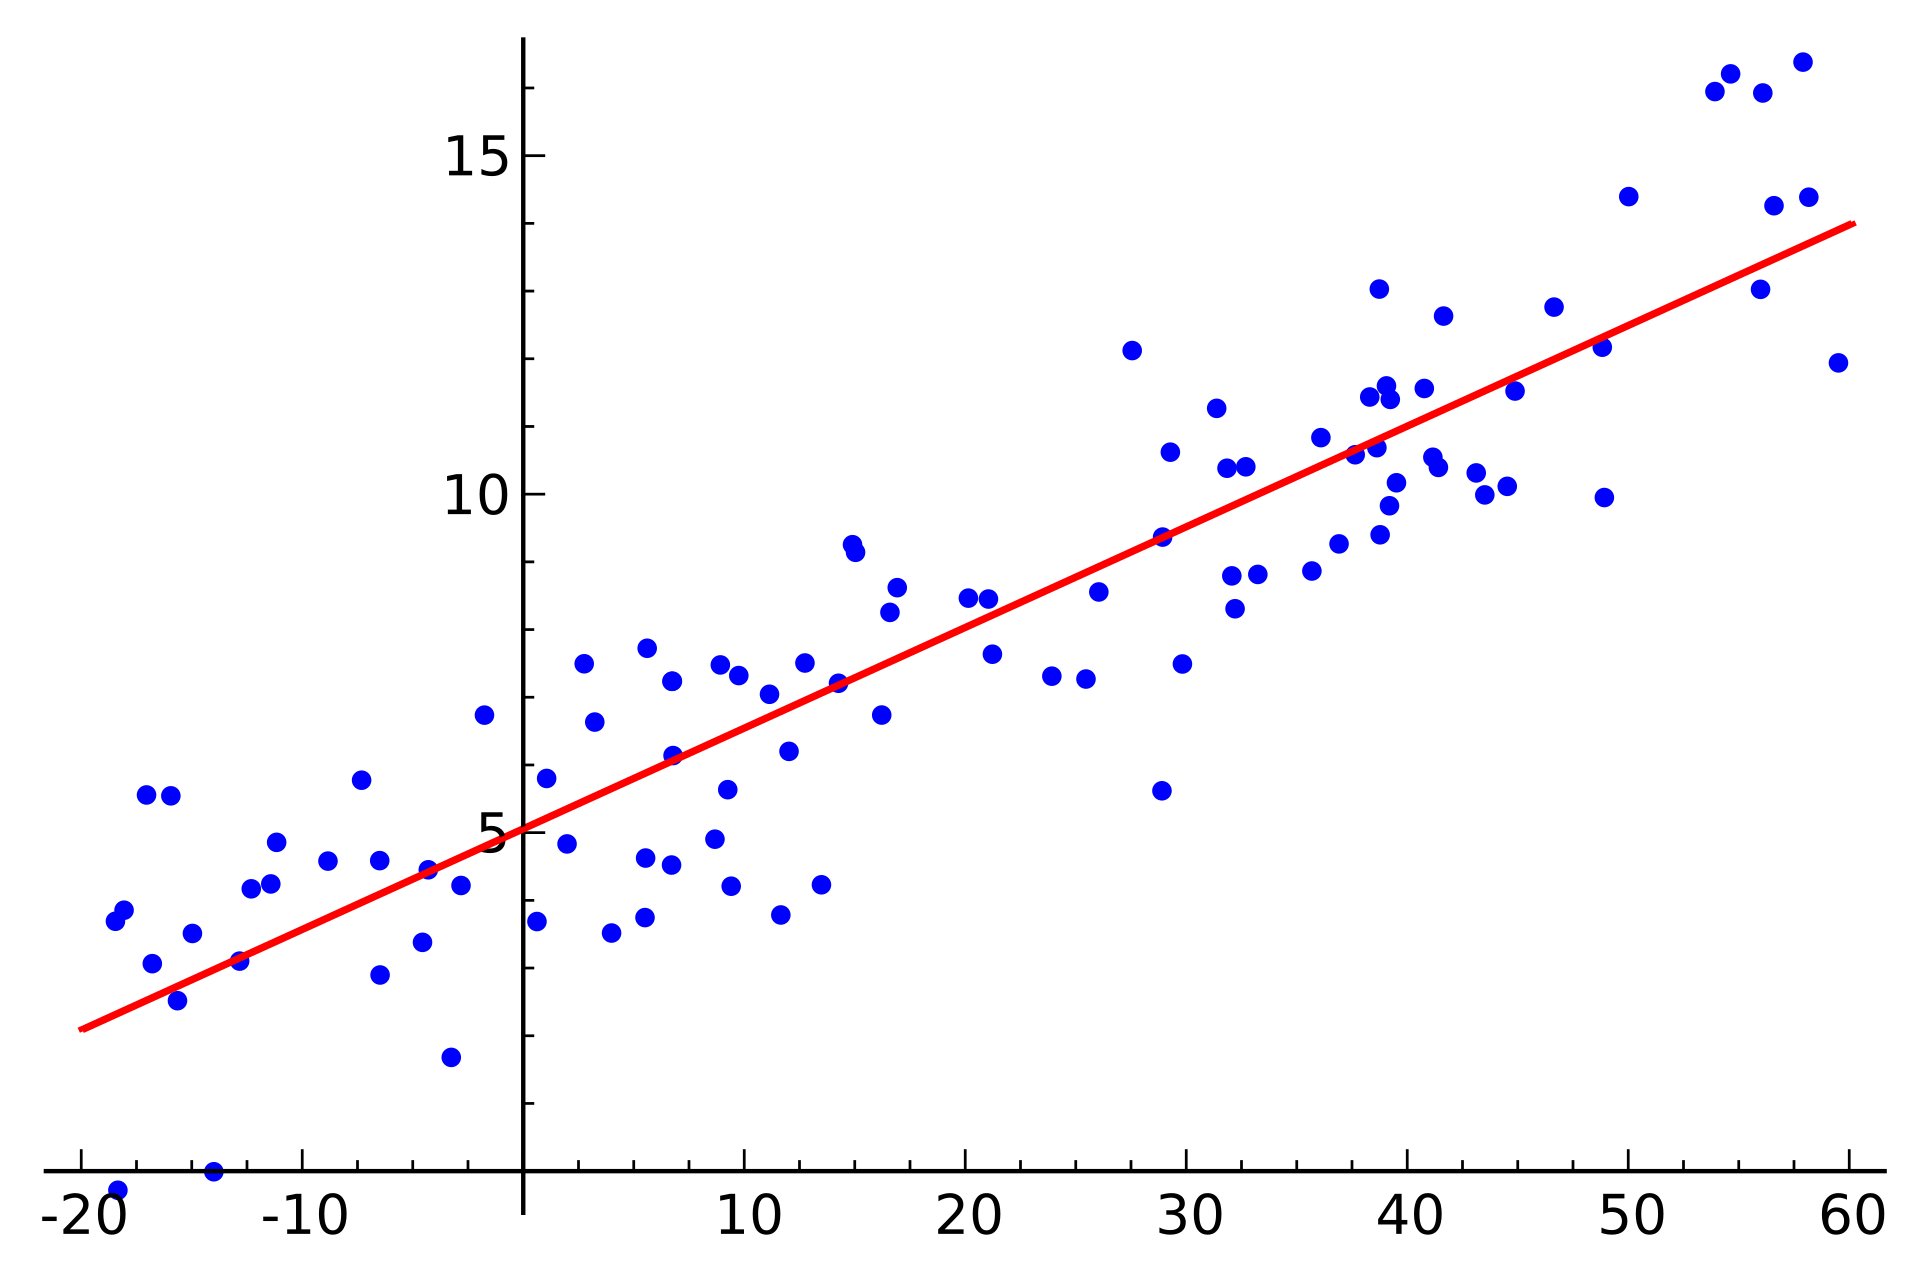

In [24]:
Image("lm.png")

## Meaning of Regression
Regression attempts to predict one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables, usually denoted by X).

## Linear Regression
Linear Regression is a way of predicting a response Y on the basis of a single predictor variable X. It is assumed that there is approximately a linear relationship between X and Y. Mathematically, we can represent this relationship as:

 Y ≈ ɒ + ß X + ℇ

where ɒ and ß are two unknown constants that represent intercept and slope terms in the linear model and ℇ is the error in the estimation.

## Example
Let’s take the simplest possible example. Calculate the regression with we have to consider a case where there are more than 2 data points.

By applying linear regression we can take multiple X’s and predict the corresponding Y values. This is depicted in the plot below:

Our goal with linear regression is to minimise the vertical distance between all the data points and our line.

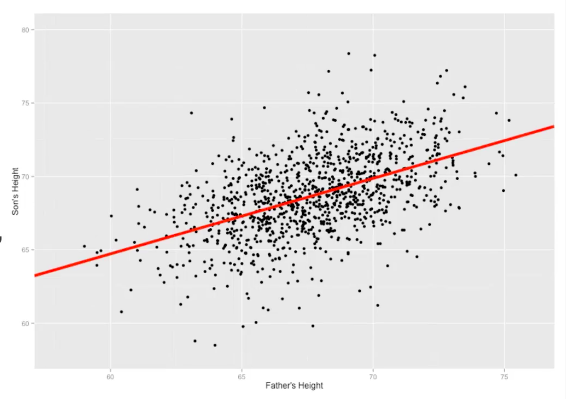

In [26]:
Image("lm2.png")

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
sns.pairplot(USAhousing)

In [18]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()
USAhousing.info()
USAhousing.describe()
USAhousing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

In [29]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

Here, I’m considering Price as the dependent variable and the rest as independent variables. Which means I have to predict the Price given the independent variables.

Now its time to play around with the data and create some visualizations.

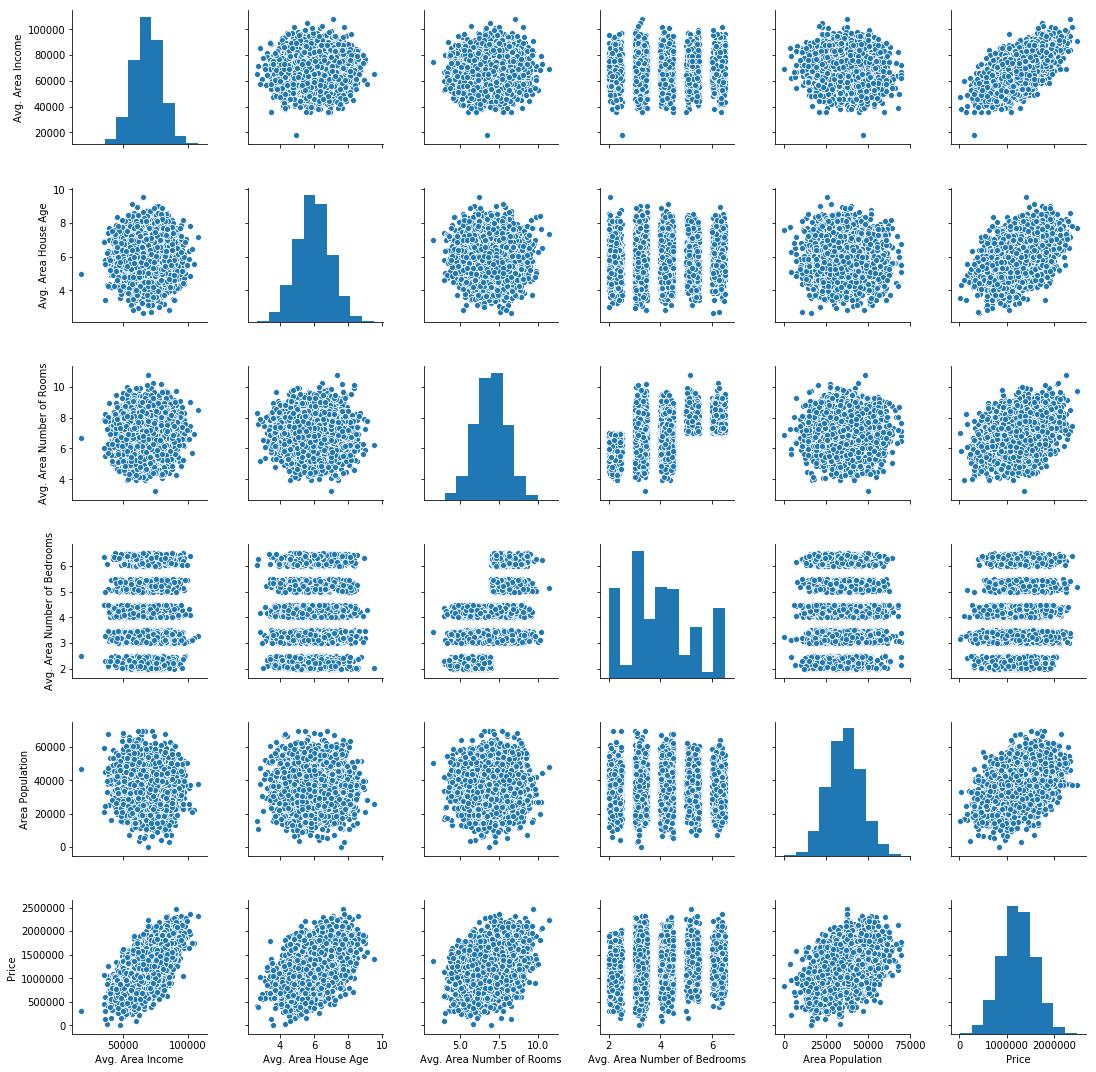

In [30]:
sns.pairplot(USAhousing)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

## Correlation
The correlation coefficient, or simply the correlation, is an index that ranges from -1 to 1. When the value is near zero, there is no linear relationship. As the correlation gets closer to plus or minus one, the relationship is stronger. A value of one (or negative one) indicates a perfect linear relationship between two variables.

Let’s find the correlation between the variables in the dataset.



In [31]:
USAhousing.corr()

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.019788        -0.016234   
Avg. Area House Age                               0.006149        -0.018743   
Avg. Area Number of Rooms                         0.462695         0.002040   
Avg. Area Number of Bedrooms                      1.000000        -0.022168   
Area Population                                  -0.022168         1.000000   
Price                                             0.171071         0.408556   

                                 Price  
Avg. Area Income              0.639734  
Avg. Area House Age           0.452543  
Avg. Area Number of Rooms     0.335664  
Avg. Area Number of Bedrooms  0.171071  
Area Population               0.408556  
Price                         1.000000

And now, let’s plot the correlation using a heatmap:

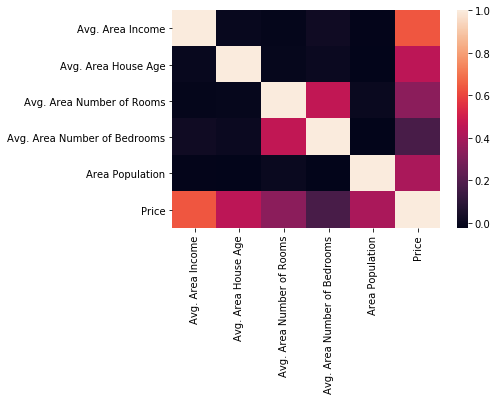

In [32]:
# plot the heatmap
corr=USAhousing.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

The black colour represents that there is no linear relationship between the two variables. A lighter shade shows that the relationship between the variables is more linear.

## Training a Linear Regression Model
Let’s now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can’t use.

In [19]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split
Our goal is to create a model that generalises well to new data. Our test set serves as a proxy for new data.Trained data is the data on which we apply the linear regression algorithm. And finally we test that algorithm on the test data.The code for splitting is as follows:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predictions from our Model

In [22]:
y_pred = lm.predict(X_test)

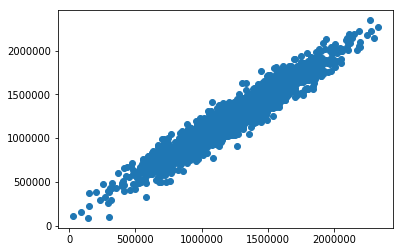

In [23]:
plt.scatter(y_test,y_pred)

In [24]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


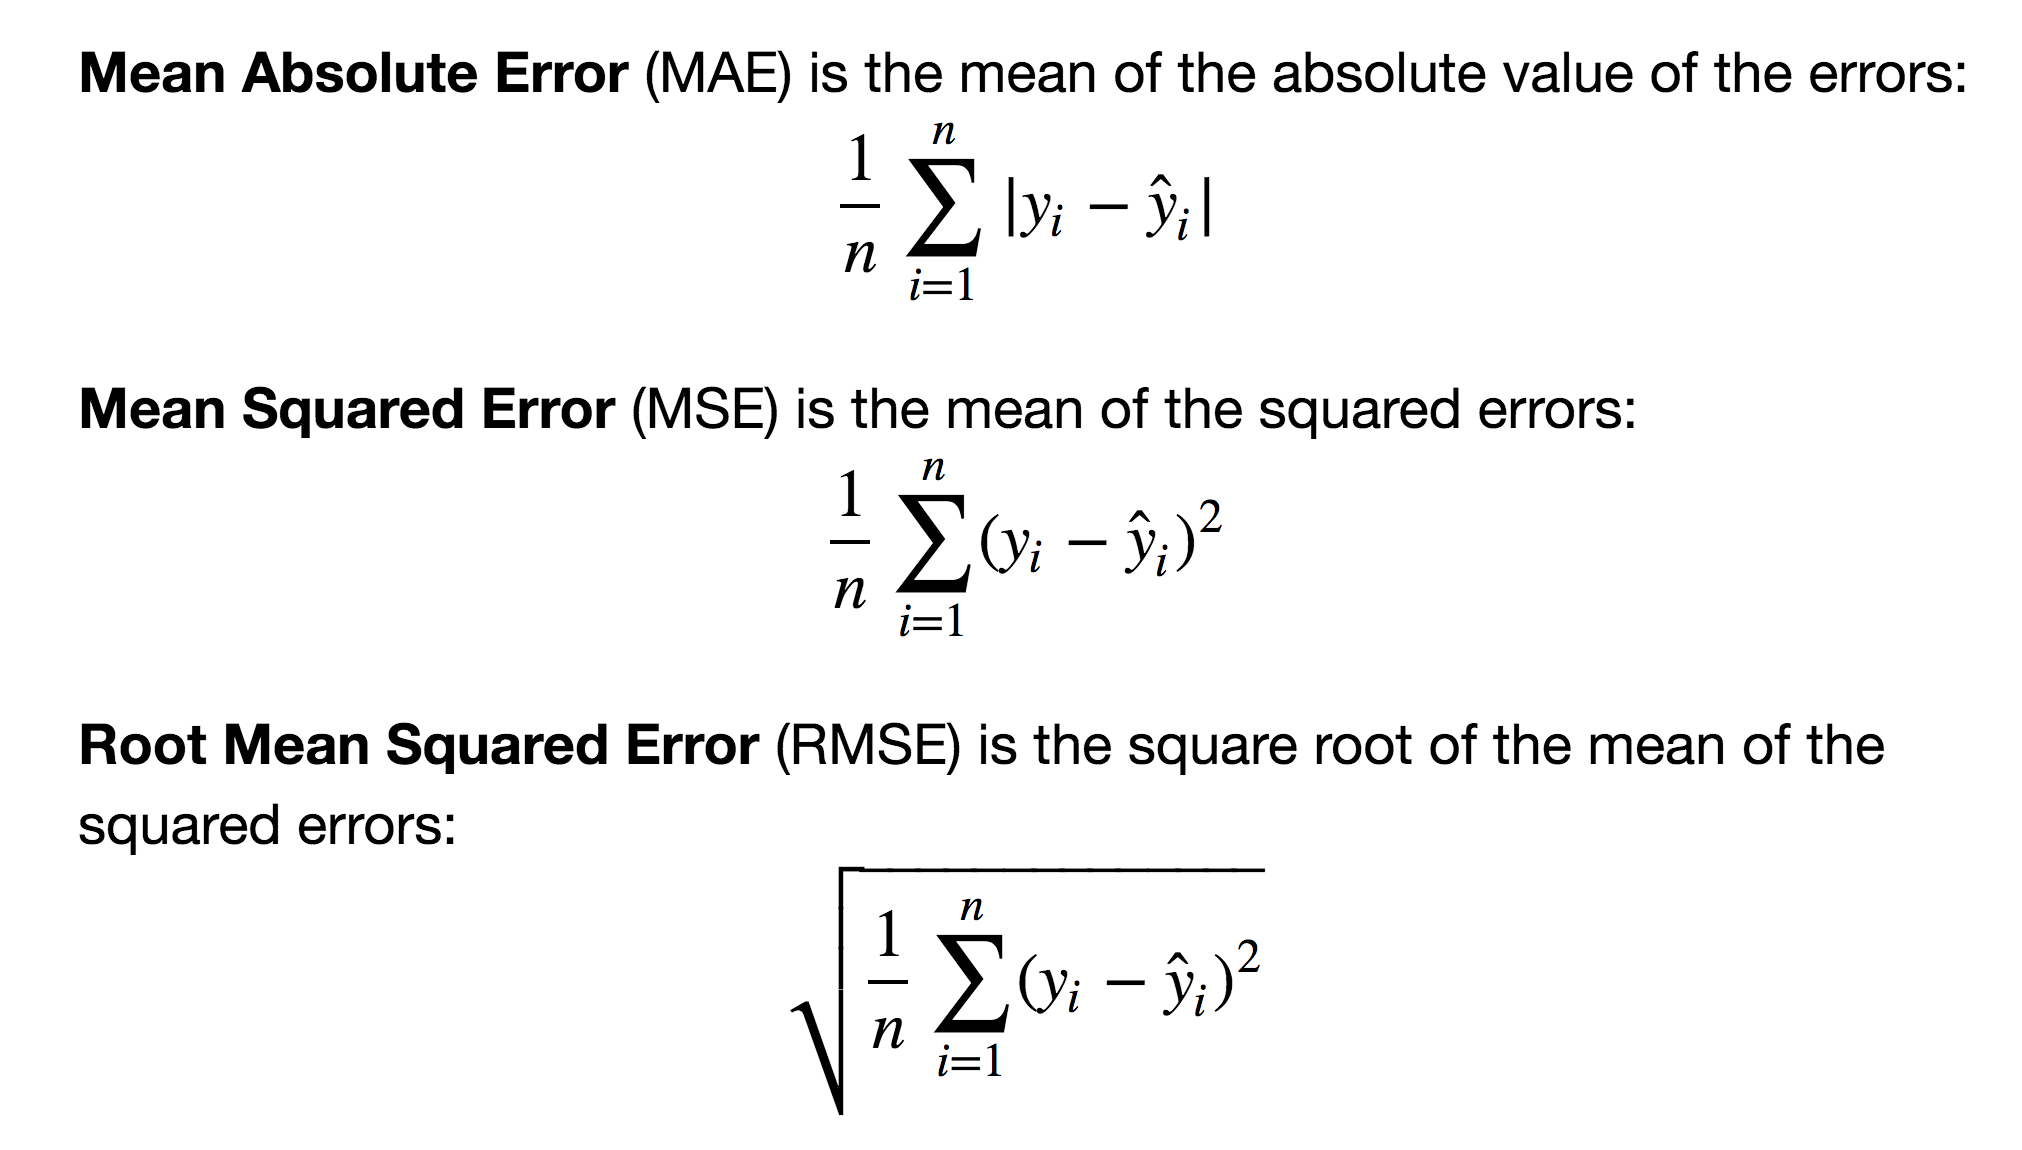

In [46]:
Image("lm3.png")

In [25]:
# calculate MAE, MSE, RMSE
from sklearn import metrics
y_true=y_test
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

82288.22251914957
10460958907.209501
102278.82922291153


How Well Does the Model Fit the data?
To evaluate the overall fit of a linear model, we use the R-squared value

R-squared is the proportion of variance explained
It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
R-squared is between 0 and 1
Higher values are better because it means that more variance is explained by the model.
Here's an example of what R-squared "looks like":



In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

## Returns the coefficient of determination (R^2) of the prediction.

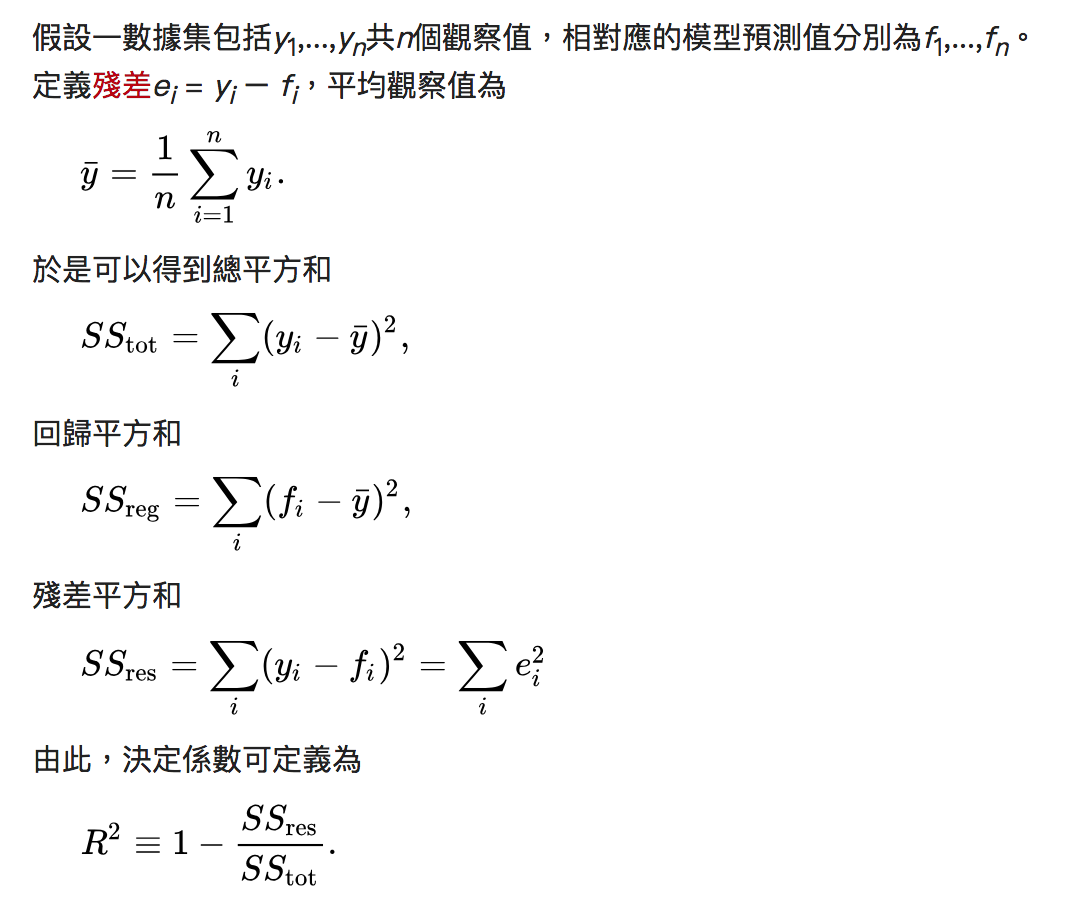

In [47]:
Image("lm4.png")

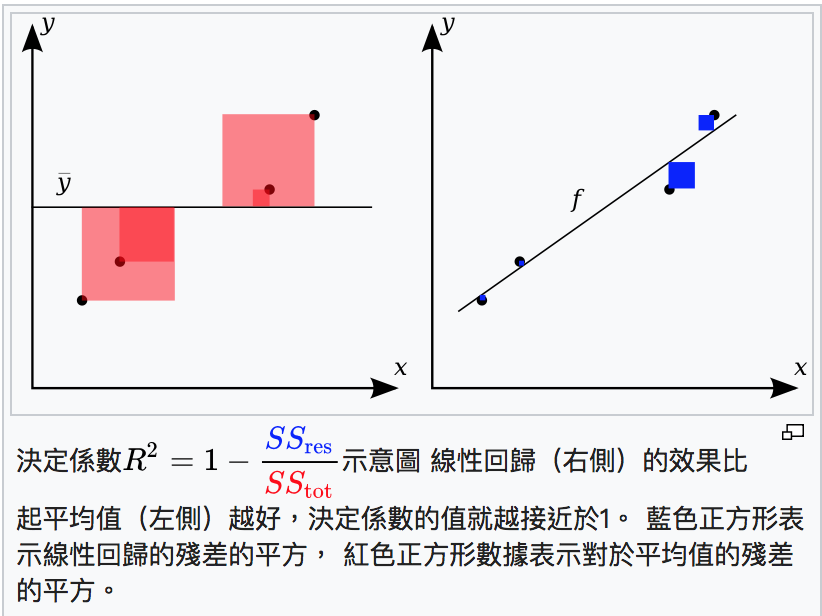

In [48]:
Image("lm5.png")

To evaluate the overall fit of a linear model, we use the R-squared value

R-squared is the proportion of variance explained

It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model

The null model just predicts the mean of the observed response, and thus it has an intercept and no slope

## R-squared is between 0 and 1

Higher values are better because it means that more variance is explained by the model.
Here's an example of what R-squared "looks like":

In [26]:
lm.score(X_test, y_true)

0.91768240096492

Is that a "good" R-squared value?

It's hard to say
The threshold for a good R-squared value depends widely on the domain
Therefore, it's most useful as a tool for comparing different models

MORE:
https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

# 4. Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 

In other words, the logistic regression model predicts P(Y=1) as a function of X.

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

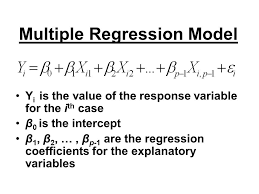

In [51]:
Image("lg1.png")

## Sigmoid Function
The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Often, sigmoid function refers to the special case of the logistic function shown in the first figure and defined by the formula.

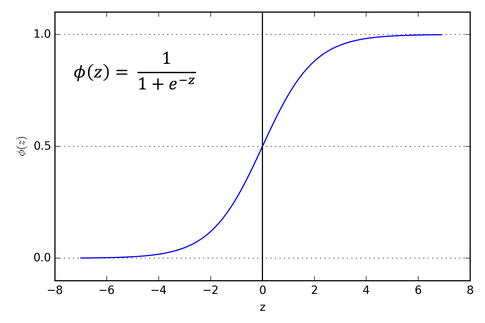

In [57]:
Image("lg6.png")

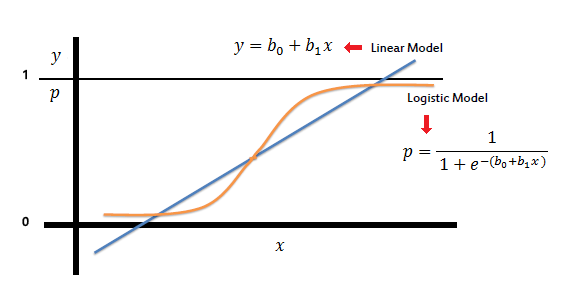

In [55]:
Image("lg3.png")

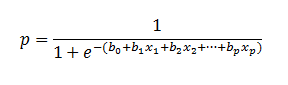

In [56]:
Image("lg5.png")

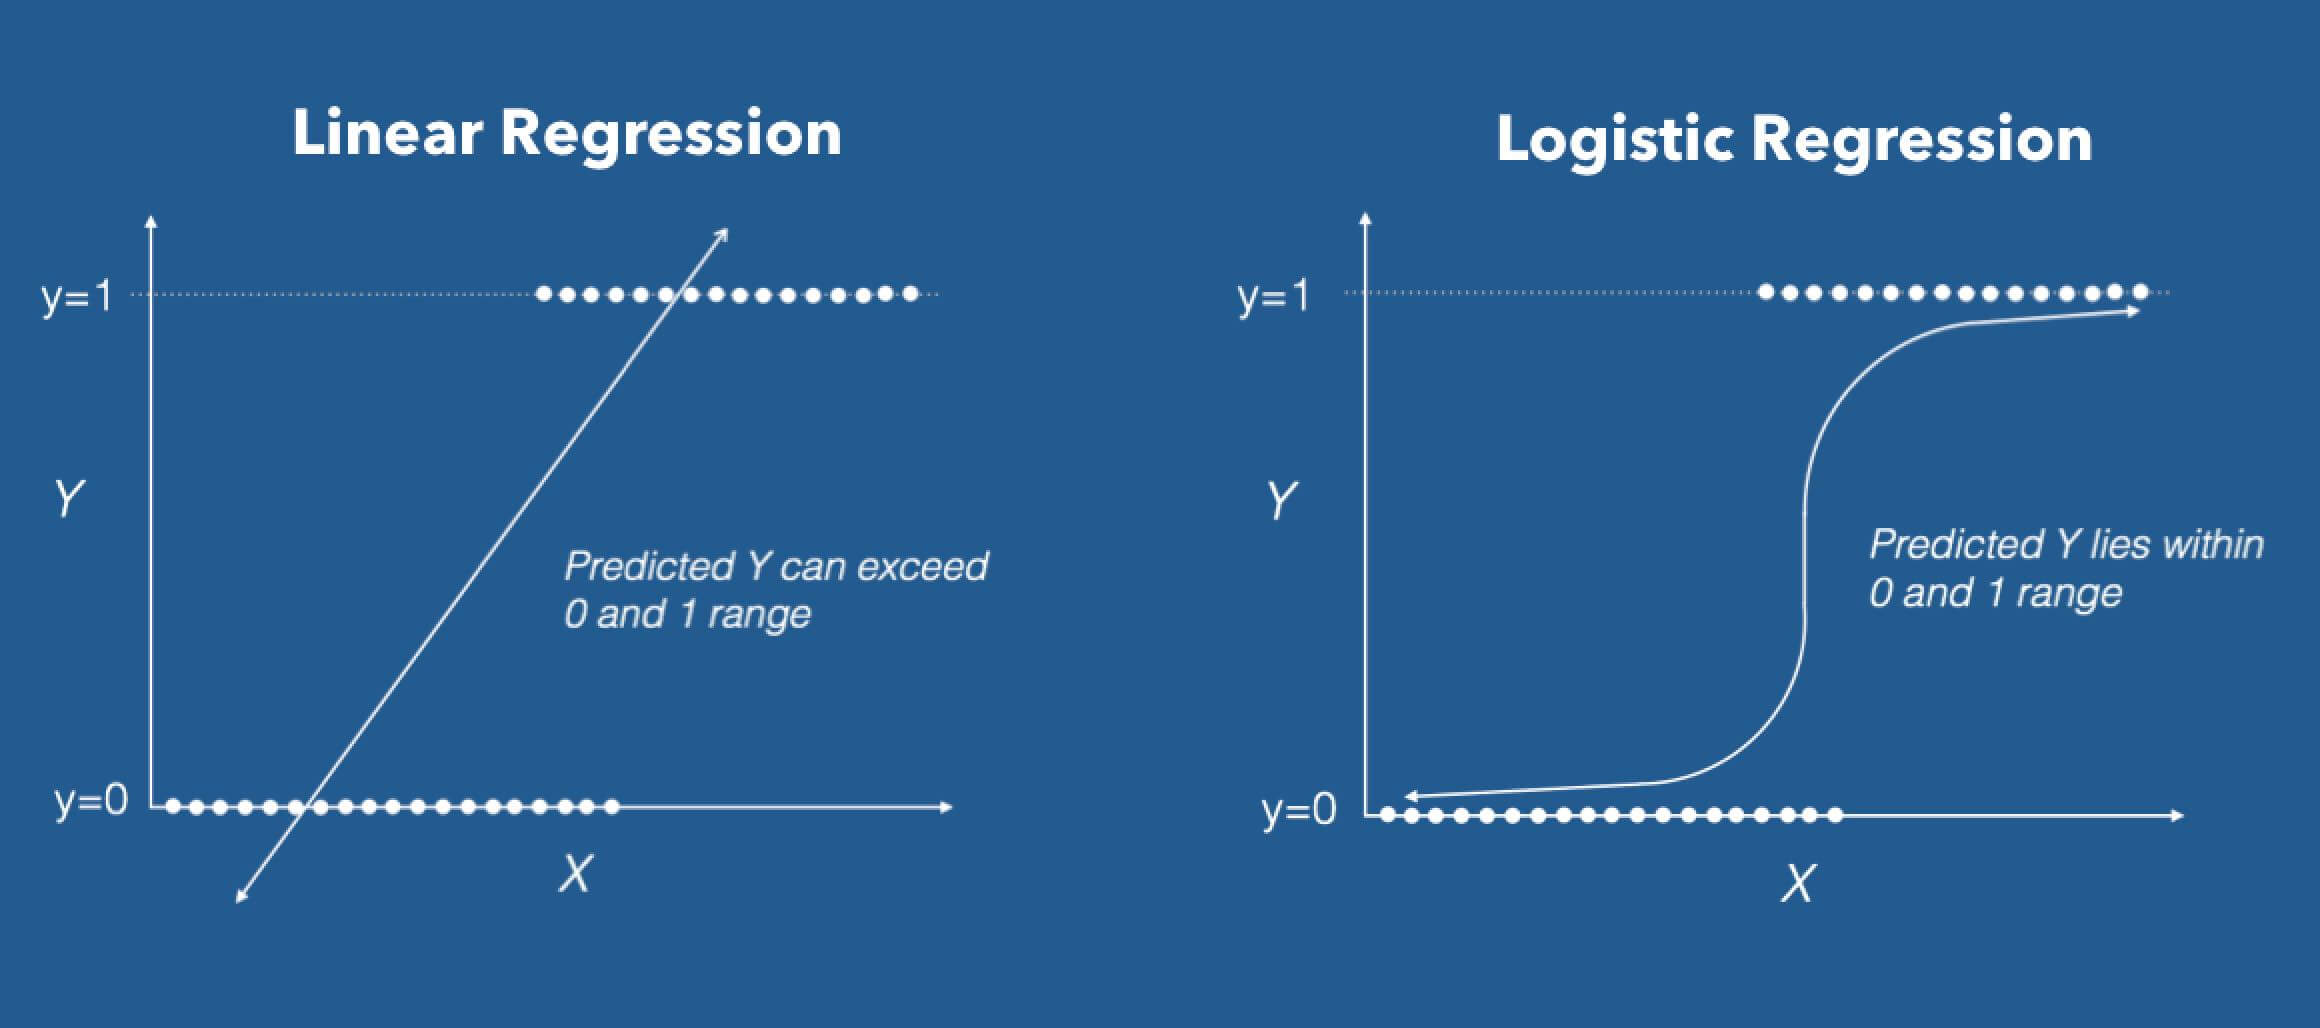

In [53]:
Image("lg2.jpg")

## Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.
Keeping the above assumptions in mind, let’s look at our dataset.

## Linear Regression Vs. Logistic Regression
Linear regression gives you a continuous output, but logistic regression provides a constant output. 

An example of the continuous output is house price and stock price. 

Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. 

Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

## Maximum Likelihood Estimation Vs. Least Square Method
The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). Both are used to estimate the parameters of a linear regression model. MLE assumes a joint probability mass function, while OLS doesn't require any stochastic assumptions for minimizing distance.

In [27]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Pima Indian Diabetes dataset
#皮馬印第安人糖尿病數據集

In [33]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")

In [34]:
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Selecting Feature
Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [35]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [36]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [43]:
logreg.predict_proba(X_test)

array([[0.04755739, 0.95244261],
       [0.83476581, 0.16523419],
       [0.89933739, 0.10066261],
       [0.36760066, 0.63239934],
       [0.87264784, 0.12735216],
       [0.96081667, 0.03918333],
       [0.26087192, 0.73912808],
       [0.14581042, 0.85418958],
       [0.58704978, 0.41295022],
       [0.61858397, 0.38141603],
       [0.42283176, 0.57716824],
       [0.03911934, 0.96088066],
       [0.69993404, 0.30006596],
       [0.81294078, 0.18705922],
       [0.87423983, 0.12576017],
       [0.84198262, 0.15801738],
       [0.15718903, 0.84281097],
       [0.97410573, 0.02589427],
       [0.59000929, 0.40999071],
       [0.75771226, 0.24228774],
       [0.35627406, 0.64372594],
       [0.55103823, 0.44896177],
       [0.81859667, 0.18140333],
       [0.93219294, 0.06780706],
       [0.94567704, 0.05432296],
       [0.66797191, 0.33202809],
       [0.95121812, 0.04878188],
       [0.09176013, 0.90823987],
       [0.89608713, 0.10391287],
       [0.85554546, 0.14445454],
       [0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

In [38]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.8072916666666666)
('Precision:', 0.7659574468085106)
('Recall:', 0.5806451612903226)


Well, you got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

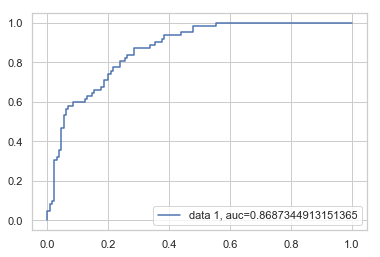

In [77]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

## Advantages
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

## Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Conclusion
In this tutorial, you covered a lot of details about Logistic Regression. You have learned what the logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts such as the sigmoid function, maximum likelihood, confusion matrix, ROC curve.

# 5 .Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

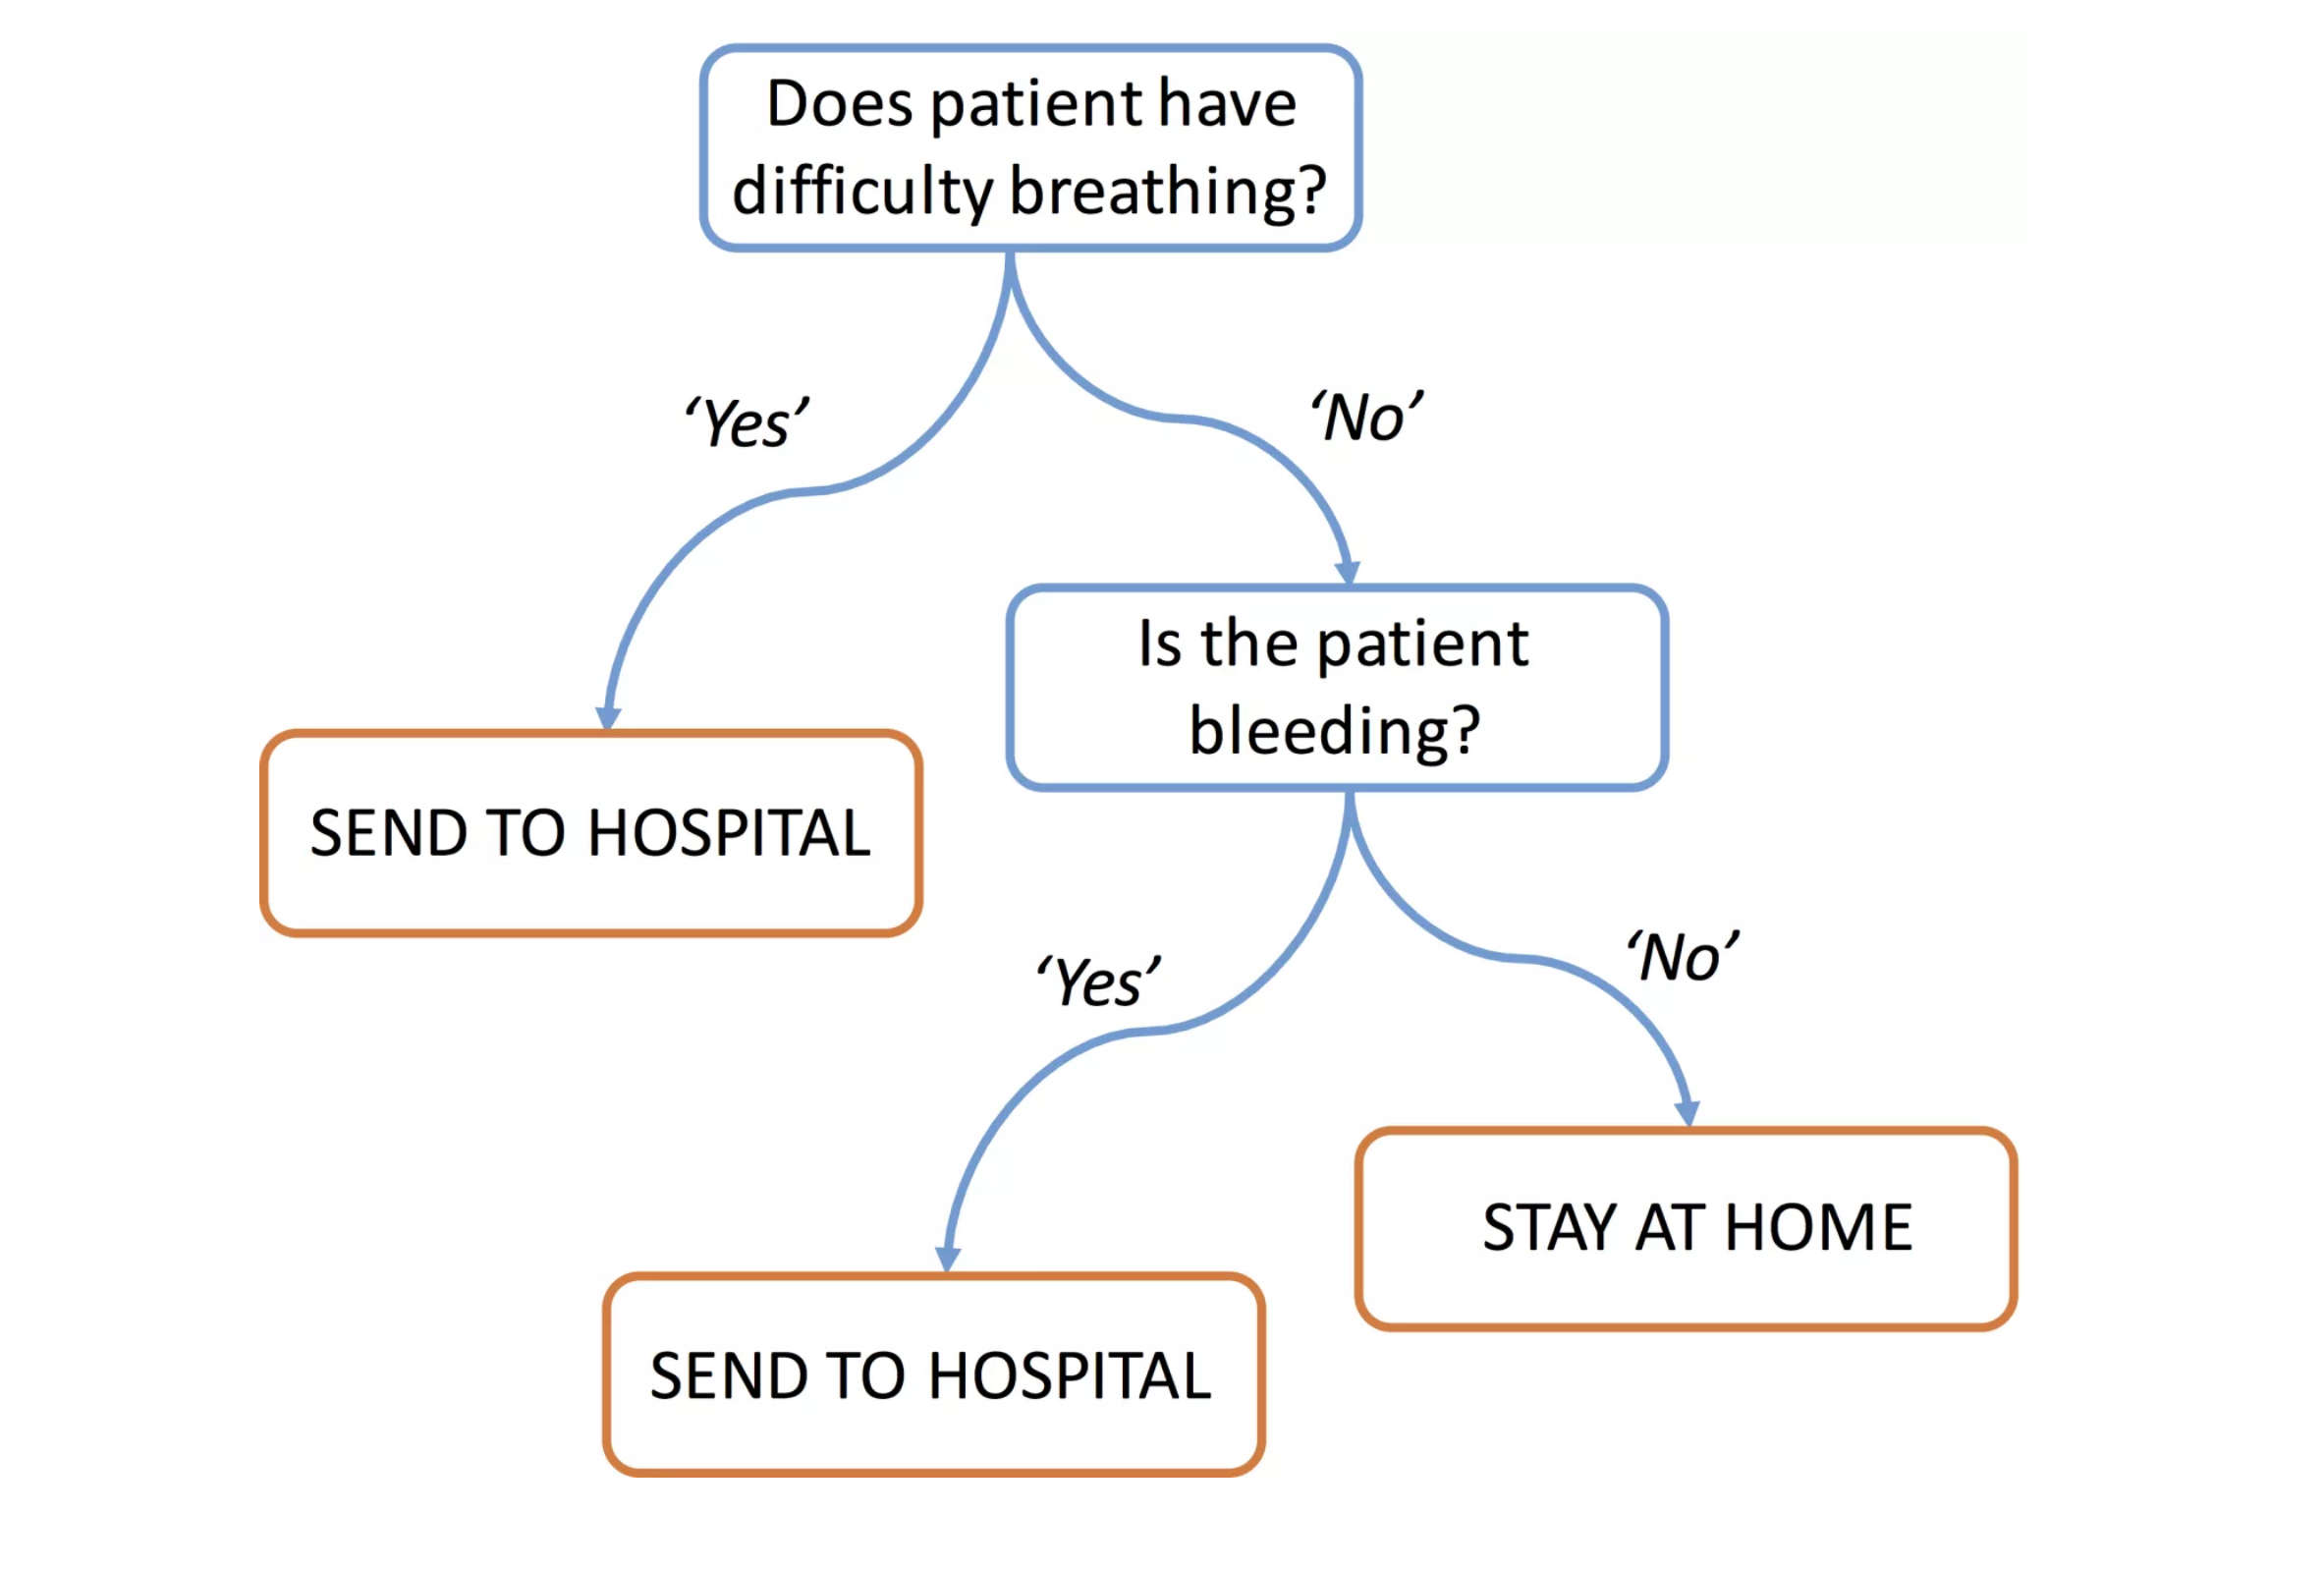

In [80]:
Image("tr.png")

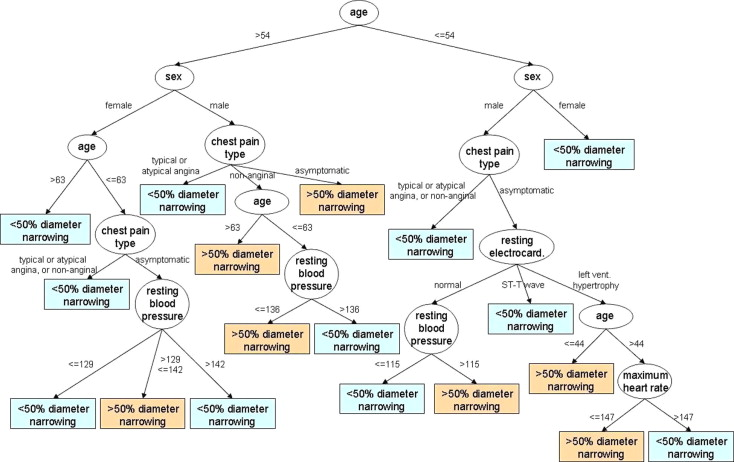

In [79]:
Image("tr1.jpg")

In [44]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
X=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [45]:
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

Decision Tree Training
Now we fit Decision tree algorithm on training data, predicting labels for validation dataset and printing the accuracy of the model using various parameters.

DecisionTreeClassifier(): This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:

criterion: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.

max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.

max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.

min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.

max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.

min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.
Let’s build classifiers using criterion as gini index & information gain. We need to fit our classifier using fit(). We will plot our decision tree classifier’s visualization too.

## Decision Tree Classifier with criterion gini index

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [108]:
y_pred = clf_gini.predict(X_test)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [109]:
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  95.55555555555556


In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

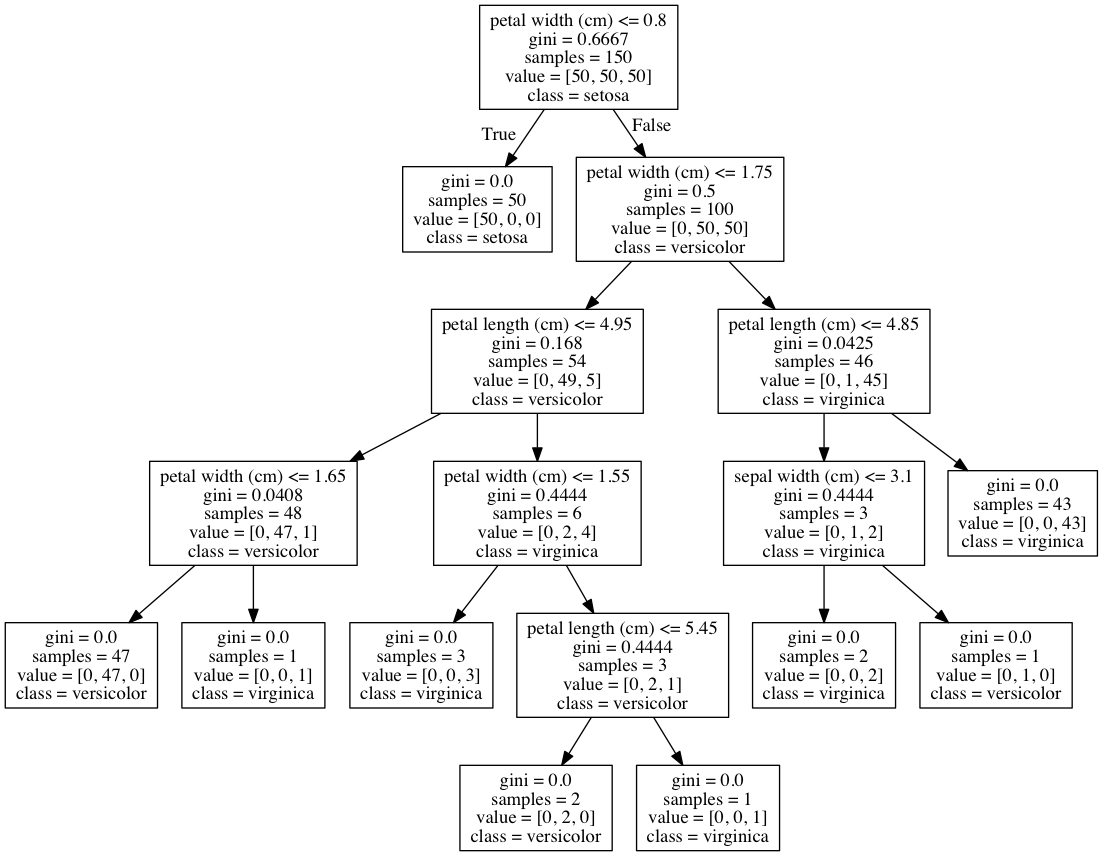

In [114]:
Image("tr5.png")

The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our three categories. We can see that our feature X2, which is the petal length, was able to completely distinguish one species of flower (Iris-Setosa) from the rest.

The biggest drawback to decision trees is that the split it makes at each node will be optimized for the dataset it is fit to. This splitting process will rarely generalize well to other data. However, we can generate huge numbers of these decision trees, tuned in slightly different ways, and combine their predictions to create some of our best models today.

# 6. SVM

## Simple SVM
In case of linearly separable data in two dimensions, as shown in Fig. 1, a typical machine learning algorithm tries to find a boundary that divides the data in such a way that the misclassification error can be minimized. If you closely look at Fig. 1, there can be several boundaries that correctly divide the data points. The two dashed lines as well as one solid line classify the data correctly.

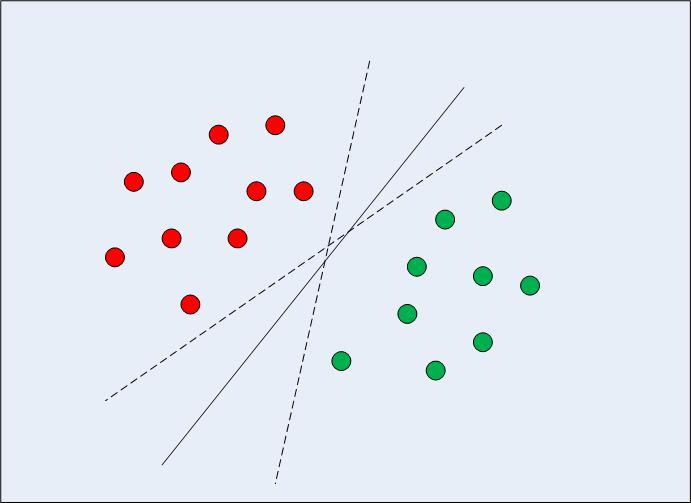

In [120]:
Image("svm1.jpg")

SVM differs from the other classification algorithms in the way that it chooses the decision boundary that maximizes the distance from the nearest data points of all the classes. An SVM doesn't merely find a decision boundary; it finds the most optimal decision boundary.

The most optimal decision boundary is the one which has maximum margin from the nearest points of all the classes. The nearest points from the decision boundary that maximize the distance between the decision boundary and the points are called support vectors as seen in Fig 2. The decision boundary in case of support vector machines is called the maximum margin classifier, or the maximum margin hyper plane.

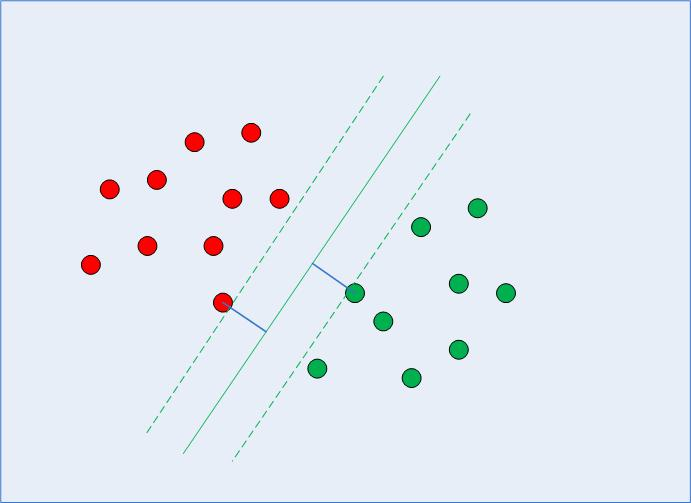

In [121]:
Image("svm2.jpg")

There is complex mathematics involved behind finding the support vectors, calculating the margin between decision boundary and the support vectors and maximizing this margin. In this tutorial we will not go into the detail of the mathematics, we will rather see how SVM and Kernel SVM are implemented via the Python Scikit-Learn library.

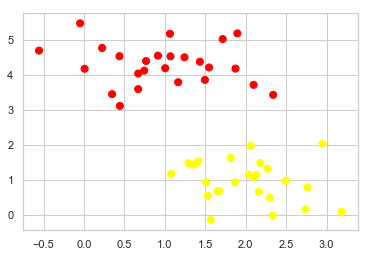

In [52]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

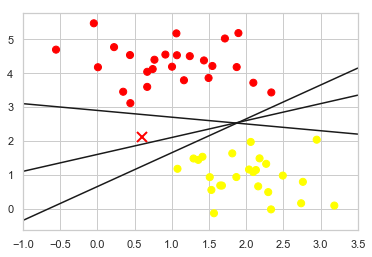

In [53]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the Margin
Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

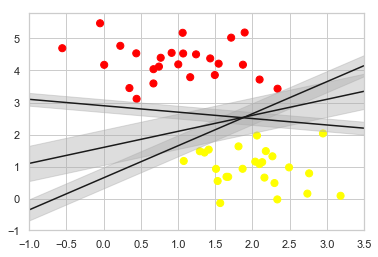

In [54]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

## Fitting a support vector machine
Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [55]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

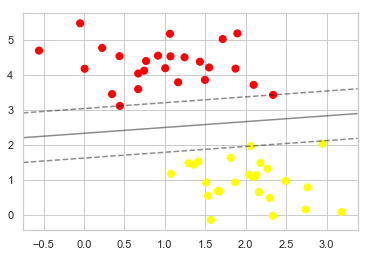

In [56]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


Beyond linear boundaries: Kernel SVM
Where SVM becomes extremely powerful is when it is combined with kernels. We have seen a version of kernels before, in the basis function regressions of In Depth: Linear Regression. There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea. To motivate the need for kernels, let's look at some data that is not linearly separable:

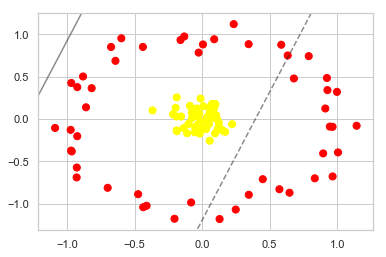

In [57]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


In [59]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,-180, 90,180], azip=(-180, 180),
         X=fixed(X), y=fixed(y));


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZWxldicsIG9wdGlvbnM9KC05MCwgLTE4MCwgOTAsIDE4MCksIHZhbHVlPS05MCksIEludFNsaWRlcih2YWx1ZT3igKY=


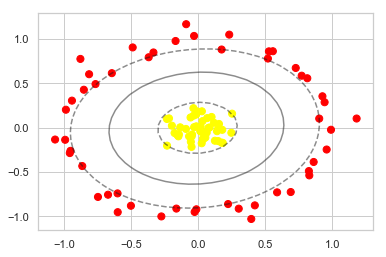

In [189]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Tuning the SVM: Softening Margins¶
Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

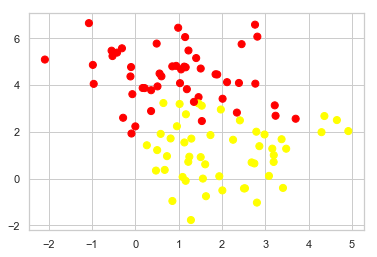

In [60]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


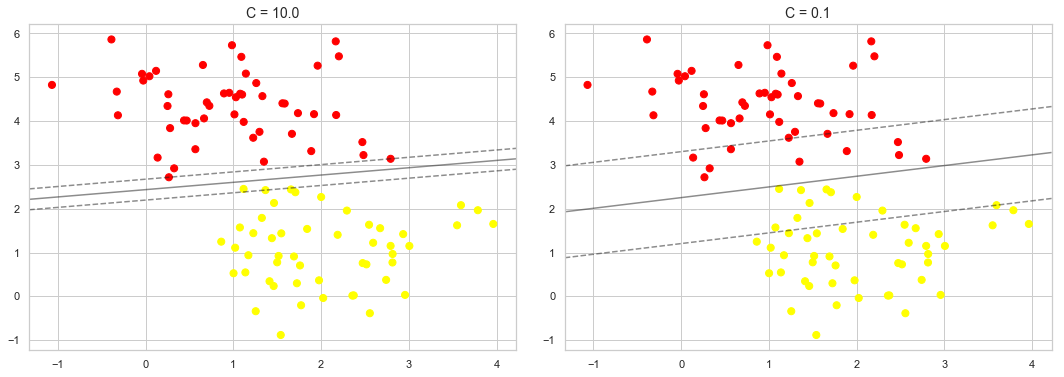

In [61]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [62]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
 
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
h = .02  # step size in the mesh
 

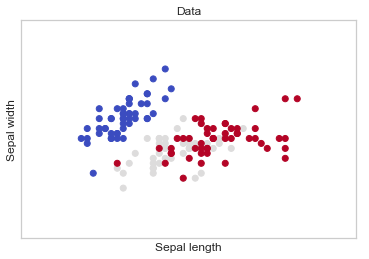

In [63]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Data')
plt.show()

In [64]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [65]:
from sklearn.svm import SVC  
svc = SVC(kernel='linear')  
svc.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [66]:
y_pred = svc.predict(X_test)  

In [67]:
from sklearn.metrics import classification_report, confusion_matrix  
print(svc.score(X_test,y_test)) 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

0.7333333333333333
[[10  0  0]
 [ 0  7  1]
 [ 0  7  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      0.88      0.64         8
           2       0.83      0.42      0.56        12

   micro avg       0.73      0.73      0.73        30
   macro avg       0.78      0.76      0.73        30
weighted avg       0.80      0.73      0.73        30



## Kernel SVM
In the previous section we saw how the simple SVM algorithm can be used to find decision boundary for linearly separable data. However, in the case of non-linearly separable data, such as the one shown in Fig. 3, a straight line cannot be used as a decision boundary.

/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


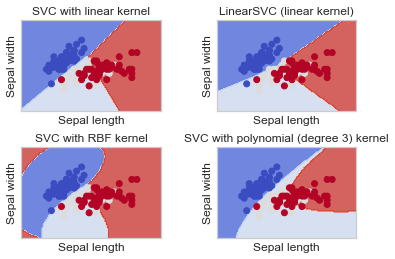

In [68]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
 
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
 
h = .05  # step size in the mesh
 
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

## Pros and Cons associated with SVM
## Pros:
1. It works really well with clear margin of separation
2. It is effective in high dimensional spaces.
3. It is effective in cases where number of dimensions is greater than the number of samples.
4. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

## Cons:
1. It doesn’t perform well, when we have large data set because the required training time is higher
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

# 7. Neural Networks

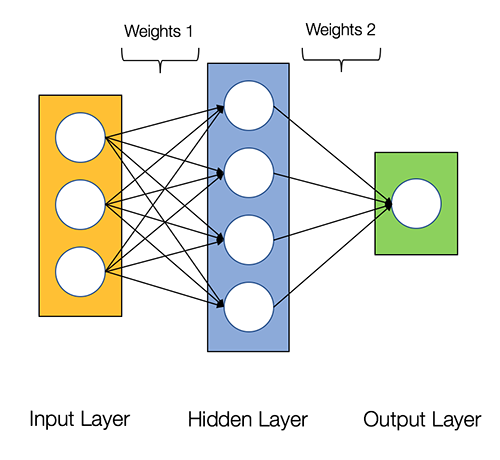

In [193]:
Image("nn1.png")

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [70]:
cancer.keys()

['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']

In [71]:
X = cancer['data']
y = cancer['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Data Preprocessing
 
The neural network may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training the model
 
Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

In [76]:
from sklearn.neural_network import MLPClassifier

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set:

In [201]:
nn = MLPClassifier(hidden_layer_sizes=(30,30,30))
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [202]:
pred = nn.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(nn.score(X_test,y_test)) 
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.958041958041958
[[57  4]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.95      0.98      0.96        82

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# 8. Unsupervised-Clustering

In Machine Learning, the types of Learning can broadly be classified into three types: 1. Supervised Learning, 2. Unsupervised Learning and 3. Semi-supervised Learning. Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

Clustering is the grouping of objects together so that objects belonging in the same group (cluster) are more similar to each other than those in other groups (clusters). In this intro cluster analysis tutorial, we'll check out a few algorithms in Python so you can get a basic understanding of the fundamentals of clustering on a real dataset.

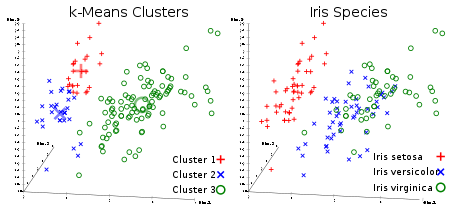

In [211]:
Image("km.png")

Here we will move on to another class of unsupervised machine learning models: clustering algorithms. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.



Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

However, this post tries to unravel the inner workings of K-Means, a very popular clustering technique. There's also a very good DataCamp post on K-Means, which explains the types of clustering (hard and soft clustering), types of clustering methods (connectivity, centroid, distribution and density) with a case study. The algorithm will help you to tackle unlabeled datasets (i.e. the datasets that do not have any class-labels) and draw your own inferences from them with ease.

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.



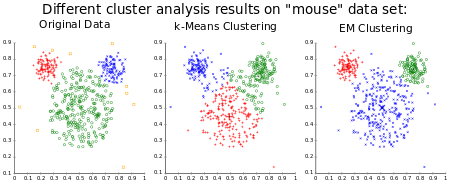

In [212]:
Image("km2.png")

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

## 1. The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
## 2. Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

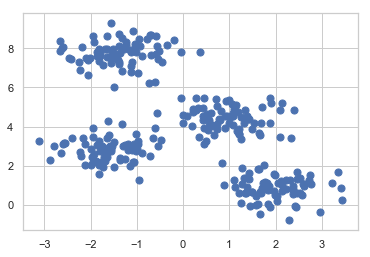

In [79]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

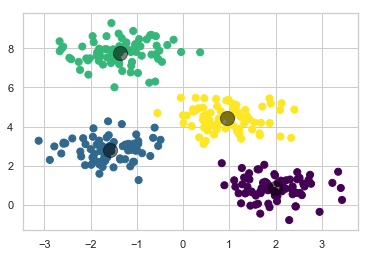

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly. Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.

## k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    2. M-Step: set the cluster centers to the mean

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. 

The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

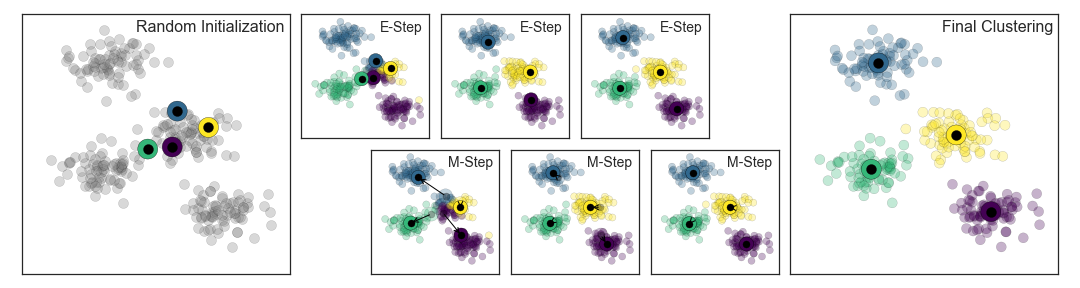

In [216]:
Image("em.png")

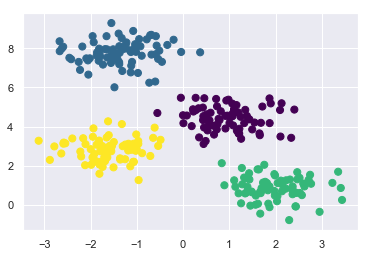

In [218]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## k-means is limited to linear cluster boundaries
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

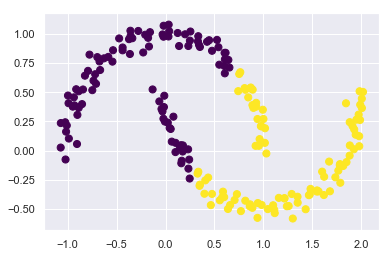

In [219]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

This situation is reminiscent of the discussion in In-Depth: Support Vector Machines, where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

/anaconda2/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


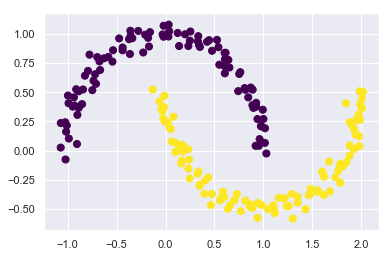

In [220]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [82]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

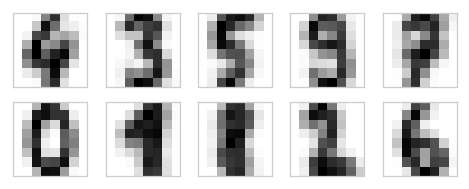

In [85]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [86]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

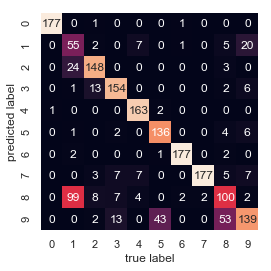

In [88]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means++	0.31s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.15s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.03s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


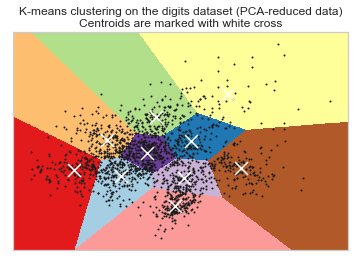

In [206]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

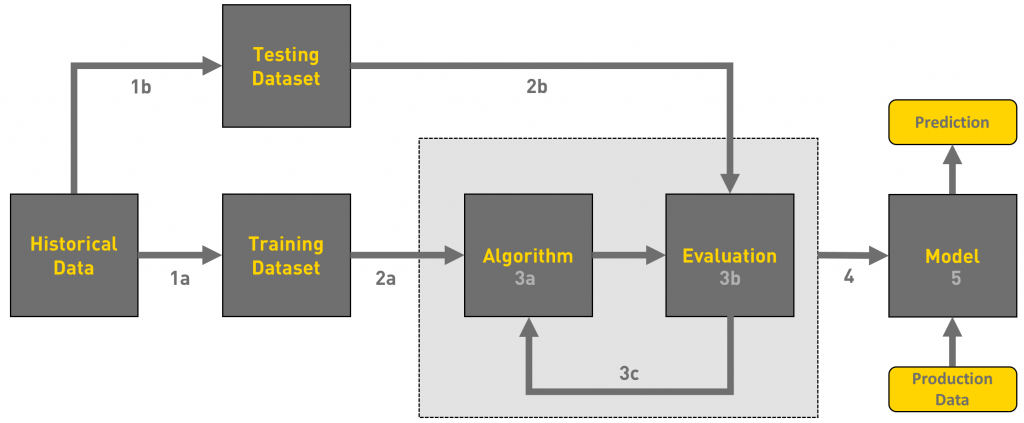

In [115]:
Image("workflow.png")

## Breast Cancer Coimbra Data Set 

In [89]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
# Read dataset to pandas dataframe
dataset = pd.read_csv('dataR2.csv')  

In [90]:
dataset.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

## Try it!

Get X,y

train_test_split( X, y)

Choose Model and Train(fit)

Predict with test data

Get Score